## PROYECTO FINAL

- IMPORTACIONES

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- IMPORTACION DE DATASET Y UNIFICACIÓN

In [3]:
df1 = pd.read_csv('/workspaces/proyectfinaltour/data/processed/prueba/Barcelona.csv')
df2 = pd.read_csv('/workspaces/proyectfinaltour/data/processed/prueba/Bilbao.csv')
df3 = pd.read_csv('/workspaces/proyectfinaltour/data/processed/prueba/Lisboa.csv')
df4 = pd.read_csv('/workspaces/proyectfinaltour/data/processed/prueba/Madrid.csv')
df5 = pd.read_csv('/workspaces/proyectfinaltour/data/processed/prueba/Malaga.csv')
df6 = pd.read_csv('/workspaces/proyectfinaltour/data/processed/prueba/Oporto.csv')
df7 = pd.read_csv('/workspaces/proyectfinaltour/data/processed/prueba/Sevilla.csv')
df8 = pd.read_csv('/workspaces/proyectfinaltour/data/processed/prueba/Valencia.csv')
df9 = pd.read_csv('/workspaces/proyectfinaltour/data/processed/prueba/Vigo.csv')
df10 = pd.read_csv('/workspaces/proyectfinaltour/data/processed/prueba/Zaragoza.csv')

In [4]:
combined_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

In [5]:
combined_df = combined_df.drop_duplicates()

In [6]:
combined_df.to_csv('/workspaces/proyectfinaltour/data/processed/unificado/weather.csv', index=False)

In [7]:
df = pd.read_csv("/workspaces/proyectfinaltour/data/processed/unificado/weather.csv")

In [8]:
num_columns = df.shape[1]
print(f"El archivo CSV tiene {num_columns} columnas.")

El archivo CSV tiene 26 columnas.


In [9]:
num_rows = df.shape[0]
print(f"El archivo CSV tiene {num_rows} filas.")

El archivo CSV tiene 39460 filas.


In [10]:
print(df.head())

        city   date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0  Barcelona  2008-07-01        27        22           0.0     14.5        6   
1  Barcelona  2008-07-02        25        19           0.0     14.5        6   
2  Barcelona  2008-07-03        25        20           0.0     14.5        6   
3  Barcelona  2008-07-04        25        19           0.0     14.5        6   
4  Barcelona  2008-07-05        27        20           0.0     14.5        6   

   uvIndex.1  moon_illumination  moonrise  ... WindChillC WindGustKmph  \
0          6                  4  04:04 AM  ...         25           19   
1          6                  0  05:07 AM  ...         24           11   
2          6                  0  06:21 AM  ...         23           14   
3          6                  3  07:41 AM  ...         22           22   
4          6                 10  08:59 AM  ...         24           18   

  cloudcover  humidity  precipMM  pressure  tempC  visibility  winddirDegr

- DATASET

In [11]:
# Cargar el dataset
file_path = '/workspaces/proyectfinaltour/data/processed/unificado/weather.csv'
df = pd.read_csv(file_path)

# Inspeccionar los primeros registros y tipos de datos
df_info = df.info()

print(df_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39460 entries, 0 to 39459
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               39460 non-null  object 
 1   date_time          39460 non-null  object 
 2   maxtempC           39460 non-null  int64  
 3   mintempC           39460 non-null  int64  
 4   totalSnow_cm       39460 non-null  float64
 5   sunHour            39460 non-null  float64
 6   uvIndex            39460 non-null  int64  
 7   uvIndex.1          39460 non-null  int64  
 8   moon_illumination  39460 non-null  int64  
 9   moonrise           39460 non-null  object 
 10  moonset            39460 non-null  object 
 11  sunrise            39460 non-null  object 
 12  sunset             39460 non-null  object 
 13  DewPointC          39460 non-null  int64  
 14  FeelsLikeC         39460 non-null  int64  
 15  HeatIndexC         39460 non-null  int64  
 16  WindChillC         394

- ORDENACIÓN Y LIMPIEZA DEL DATASET

In [12]:
# Convertir la columna 'date_time' a formato datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Eliminar la columna redundante 'uvIndex.1'
if 'uvIndex.1' in df.columns:
    df.drop(columns=['uvIndex.1'], inplace=True)

# Mostrar las primeras filas y tipos de datos para verificar los cambios
print(df.head())
print(df.info())

        city  date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0  Barcelona 2008-07-01        27        22           0.0     14.5        6   
1  Barcelona 2008-07-02        25        19           0.0     14.5        6   
2  Barcelona 2008-07-03        25        20           0.0     14.5        6   
3  Barcelona 2008-07-04        25        19           0.0     14.5        6   
4  Barcelona 2008-07-05        27        20           0.0     14.5        6   

   moon_illumination  moonrise   moonset  ... WindChillC WindGustKmph  \
0                  4  04:04 AM  08:20 PM  ...         25           19   
1                  0  05:07 AM  09:23 PM  ...         24           11   
2                  0  06:21 AM  10:12 PM  ...         23           14   
3                  3  07:41 AM  10:51 PM  ...         22           22   
4                 10  08:59 AM  11:21 PM  ...         24           18   

   cloudcover  humidity  precipMM  pressure  tempC  visibility  winddirDegree  \
0    

Generamos estadísticas descriptivas para entender mejor la distribución de los datos, lo separamos por ciudades para así ser mas precisos.

In [15]:
grouped = df.groupby('city')

In [16]:
# Crear un diccionario para almacenar estadísticas descriptivas por ciudad
stats_by_city = {}

# Calcular estadísticas descriptivas para cada ciudad y almacenarlas en el diccionario
for city, data in grouped:
    stats_by_city[city] = data.describe()

# Mostrar estadísticas descriptivas de una ciudad (ejemplo: la primera ciudad en el diccionario)
first_city = list(stats_by_city.keys())[0]
print(f"Estadísticas descriptivas para {first_city}:\n", stats_by_city[first_city])


Estadísticas descriptivas para Barcelona:
                  date_time     maxtempC     mintempC  totalSnow_cm  \
count                 3946  3946.000000  3946.000000   3946.000000   
mean   2013-11-24 12:00:00    19.244045    13.475165      0.000608   
min    2008-07-01 00:00:00     4.000000    -2.000000      0.000000   
25%    2011-03-14 06:00:00    14.000000     9.000000      0.000000   
50%    2013-11-24 12:00:00    19.000000    13.000000      0.000000   
75%    2016-08-06 18:00:00    24.000000    19.000000      0.000000   
max    2019-04-20 00:00:00    34.000000    29.000000      1.100000   
std                    NaN     5.914601     5.766123      0.024138   

           sunHour      uvIndex  moon_illumination    DewPointC   FeelsLikeC  \
count  3946.000000  3946.000000        3946.000000  3946.000000  3946.000000   
mean     10.968728     4.612772          46.115813    11.217435    16.766853   
min       3.400000     1.000000           0.000000   -12.000000    -4.000000   
25%   

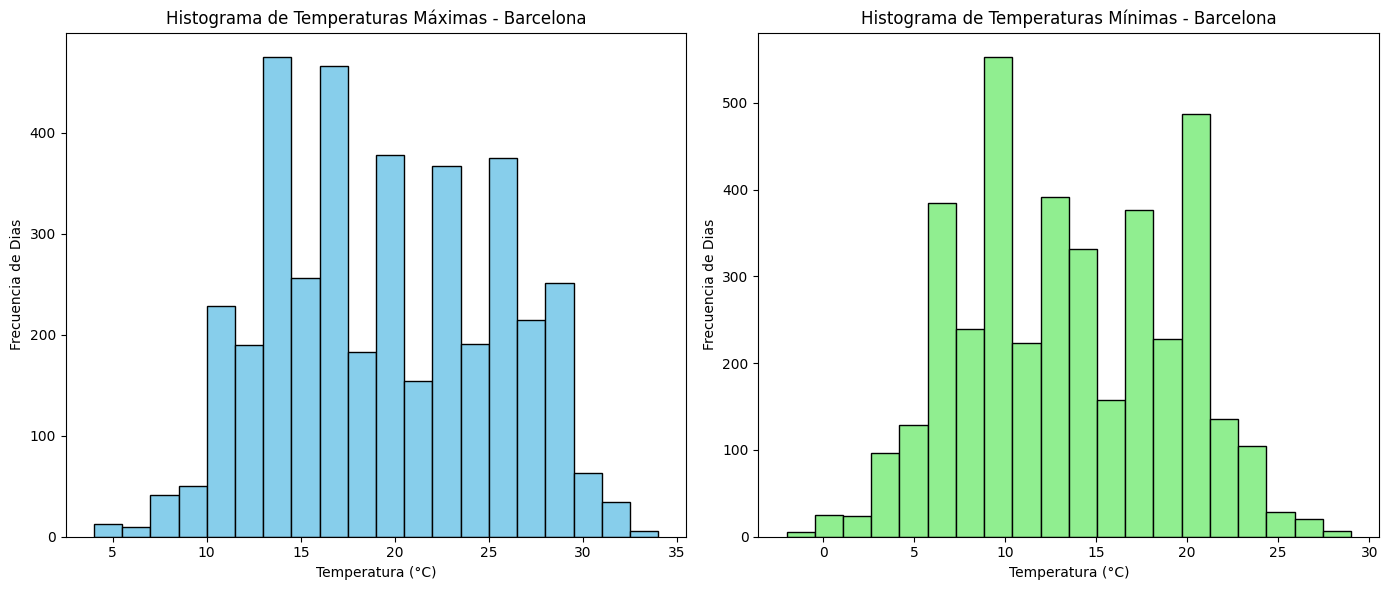

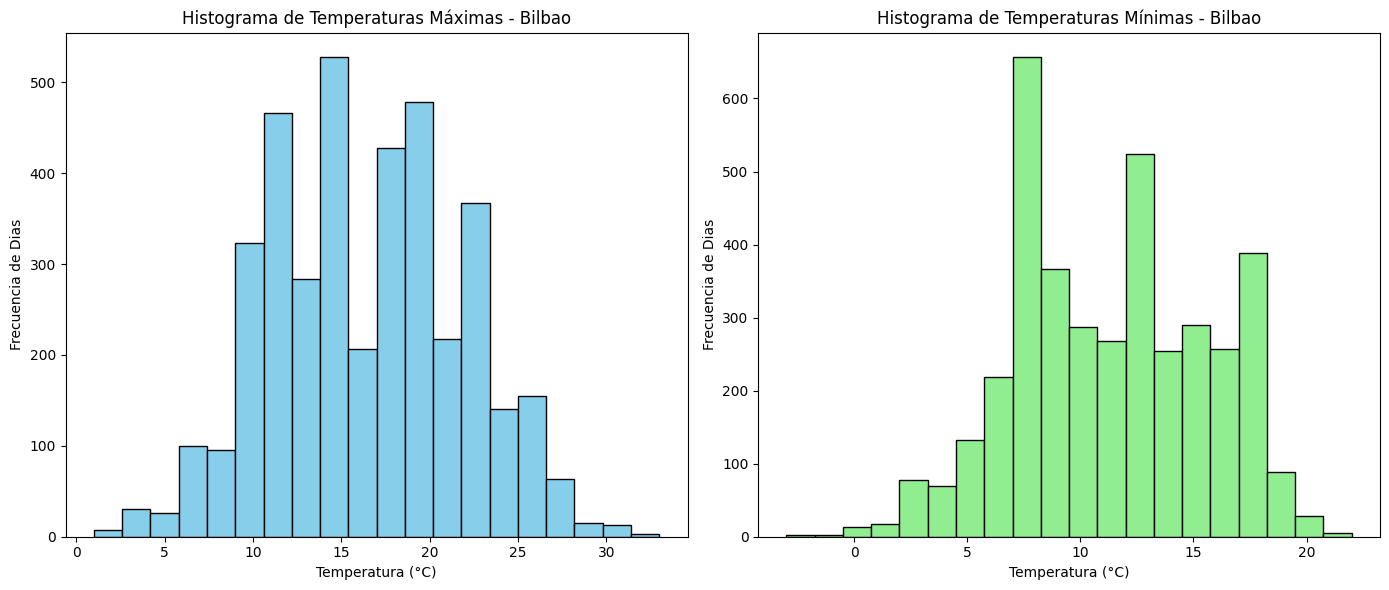

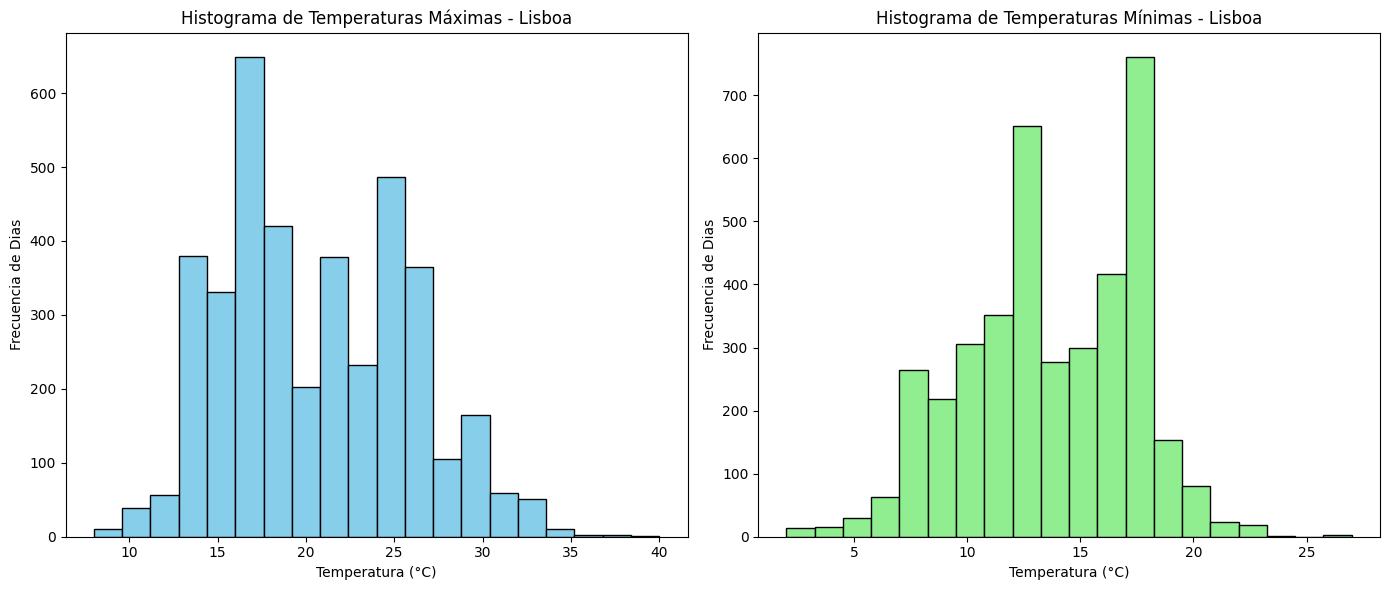

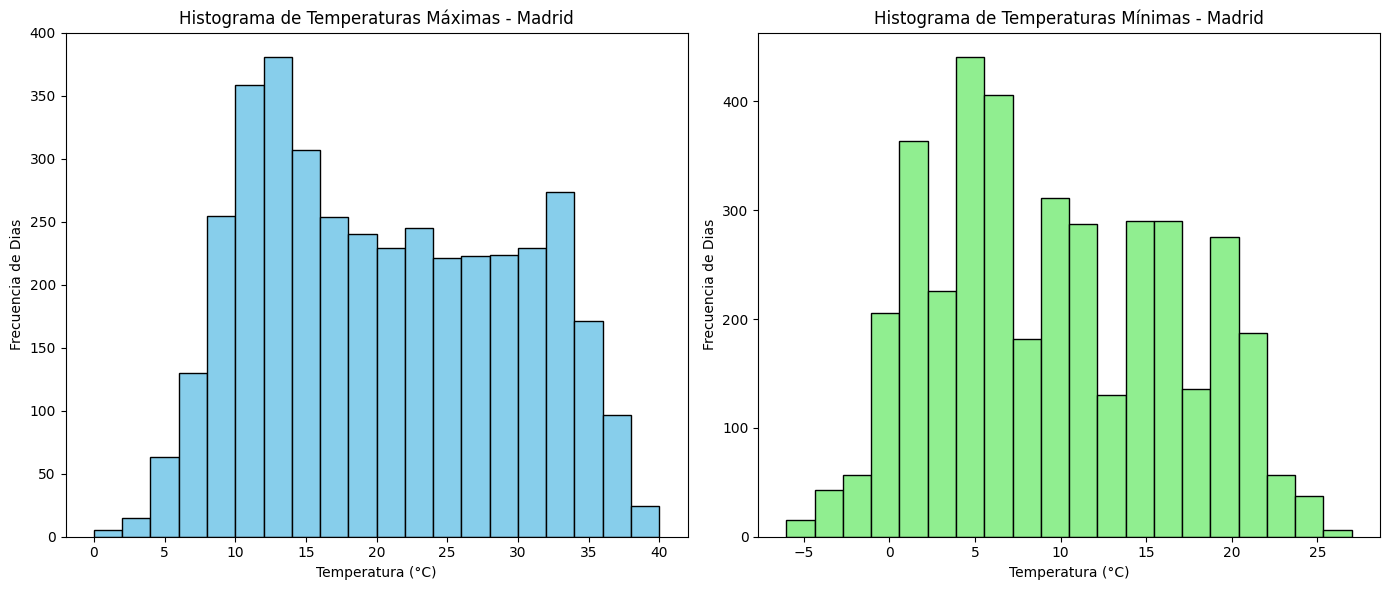

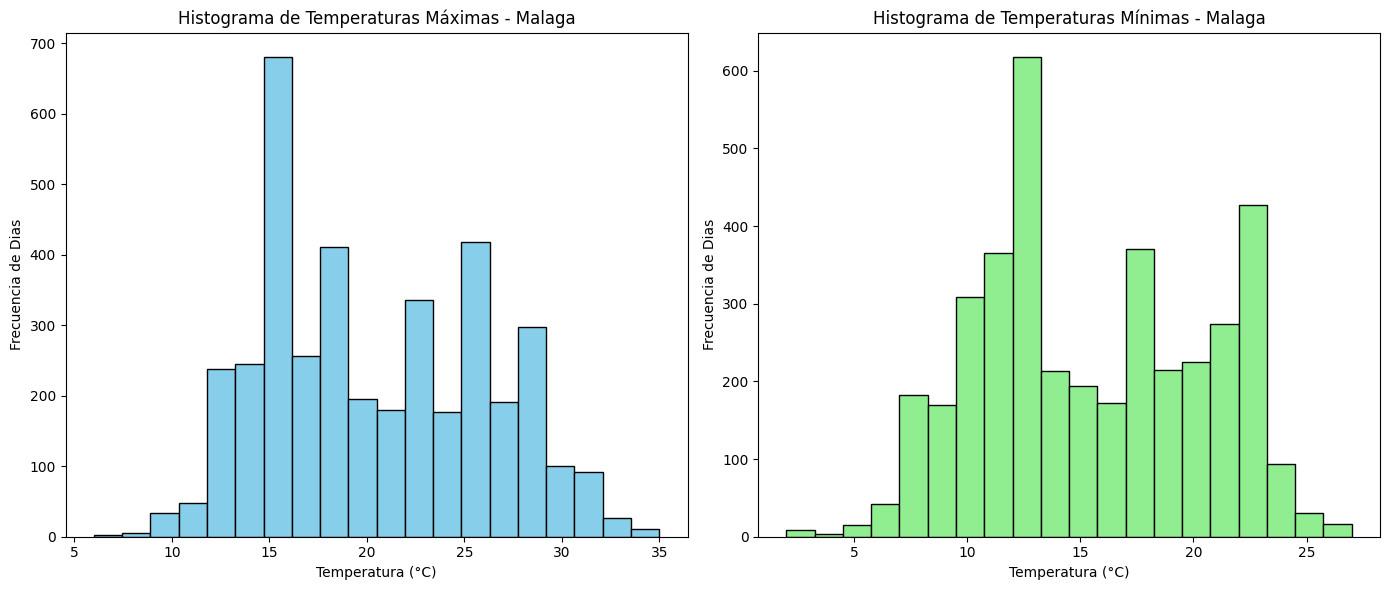

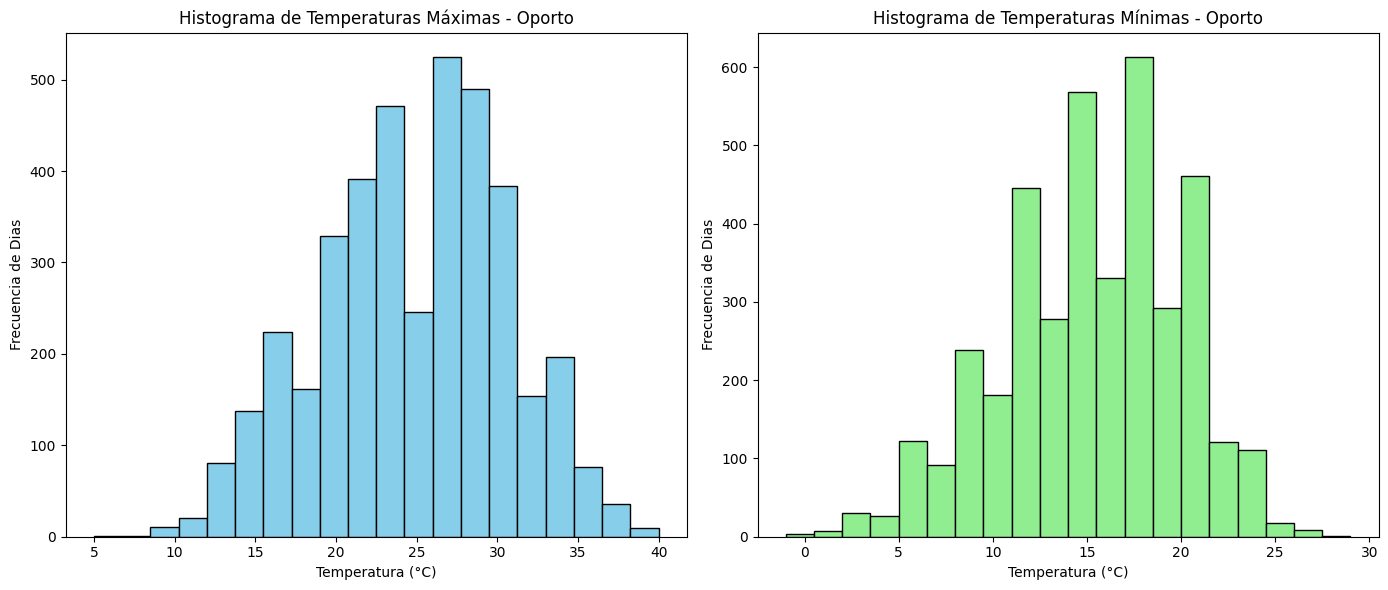

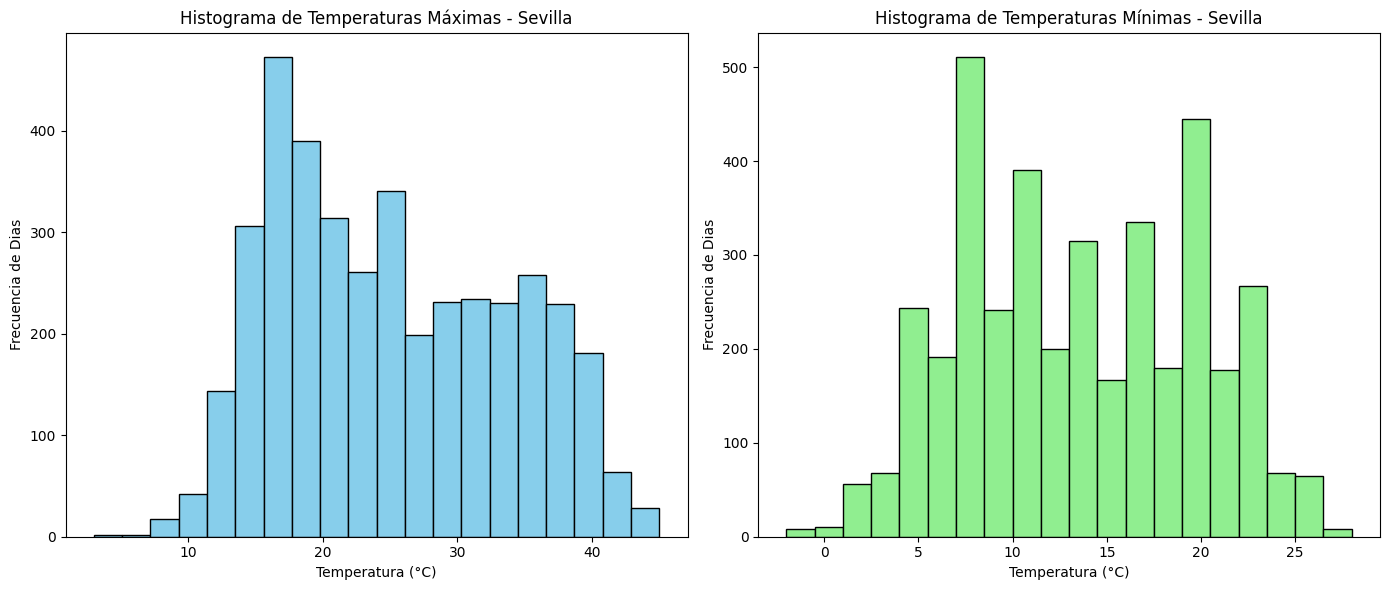

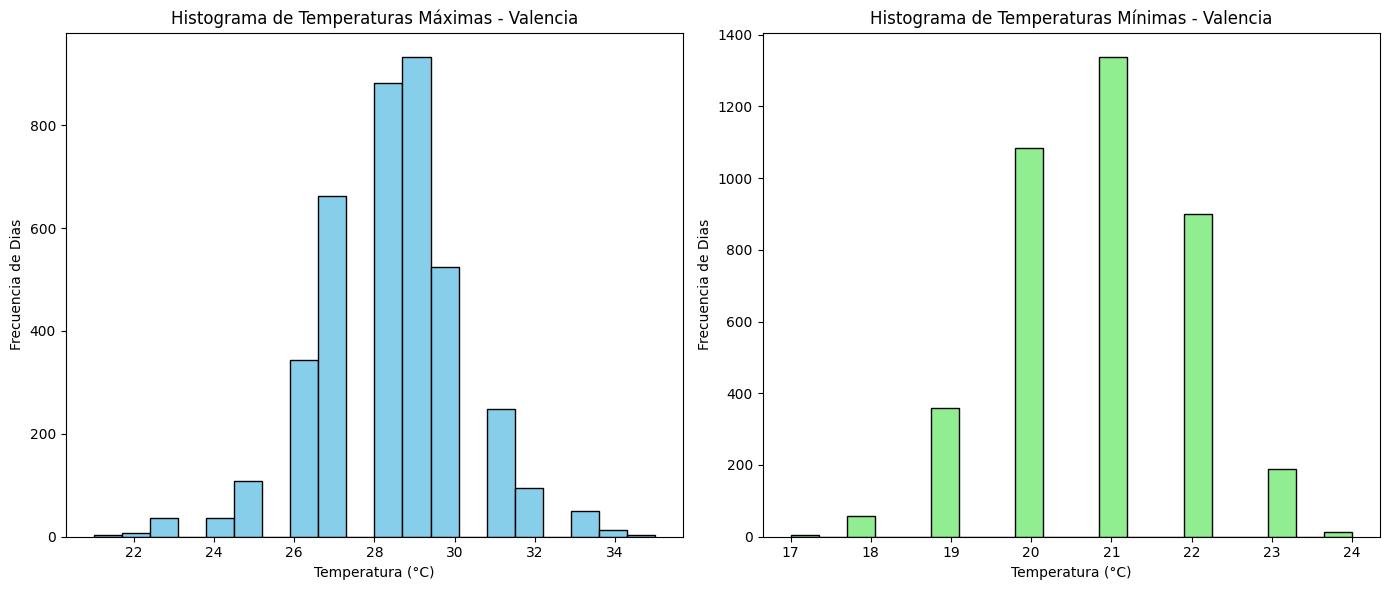

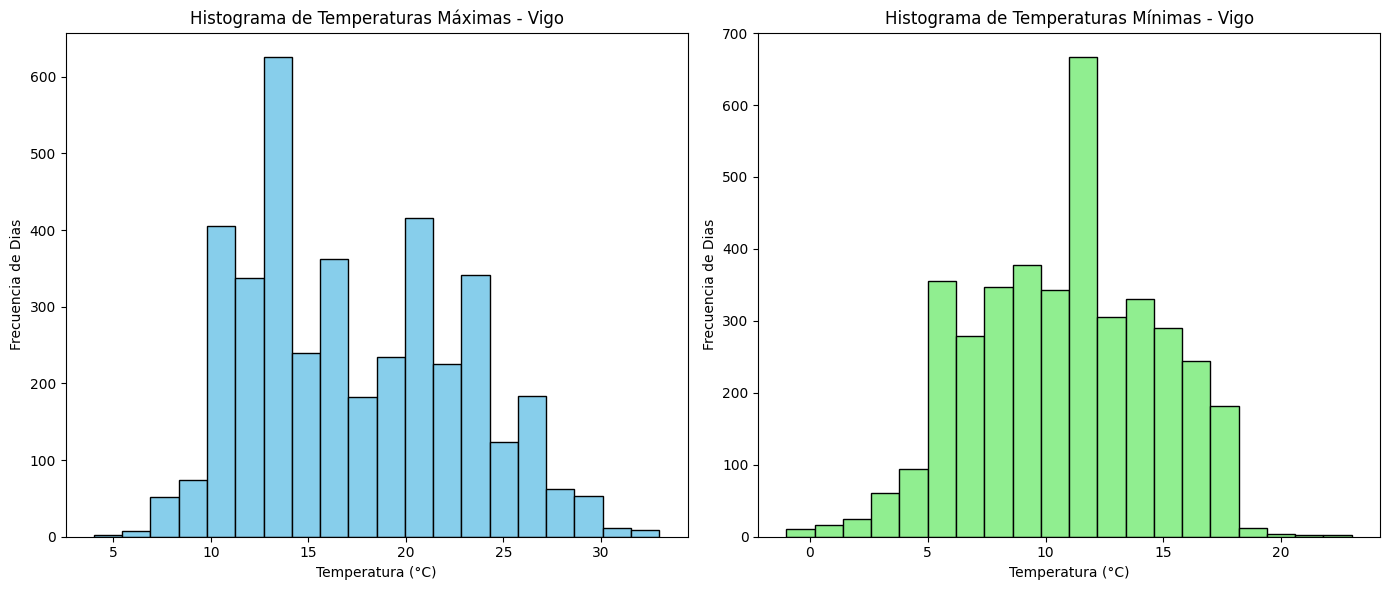

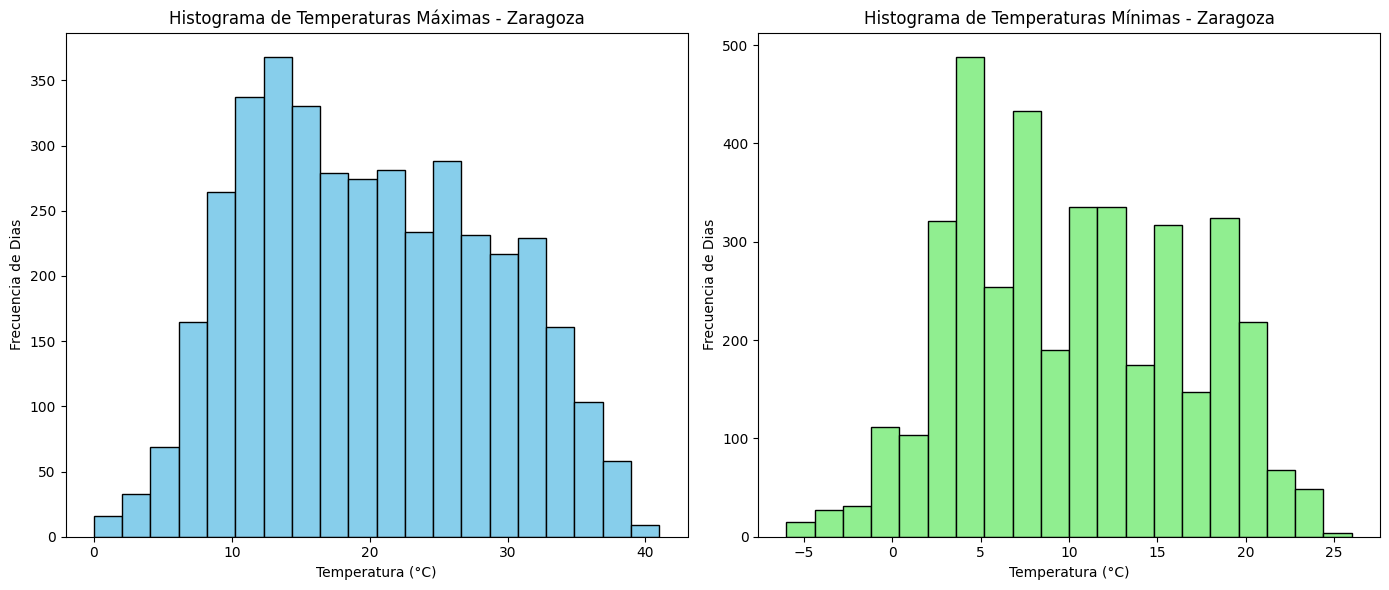

In [20]:
# Histograma de temperaturas máximas y mínimas para cada ciudad
for city, data in grouped:
    plt.figure(figsize=(14, 6))
    
    # Histograma de temperaturas máximas
    plt.subplot(1, 2, 1)
    plt.hist(data['maxtempC'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de Temperaturas Máximas - {city}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Frecuencia de Dias')

    # Histograma de temperaturas mínimas
    plt.subplot(1, 2, 2)
    plt.hist(data['mintempC'], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Histograma de Temperaturas Mínimas - {city}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Frecuencia de Dias')

    plt.tight_layout()
    plt.show()


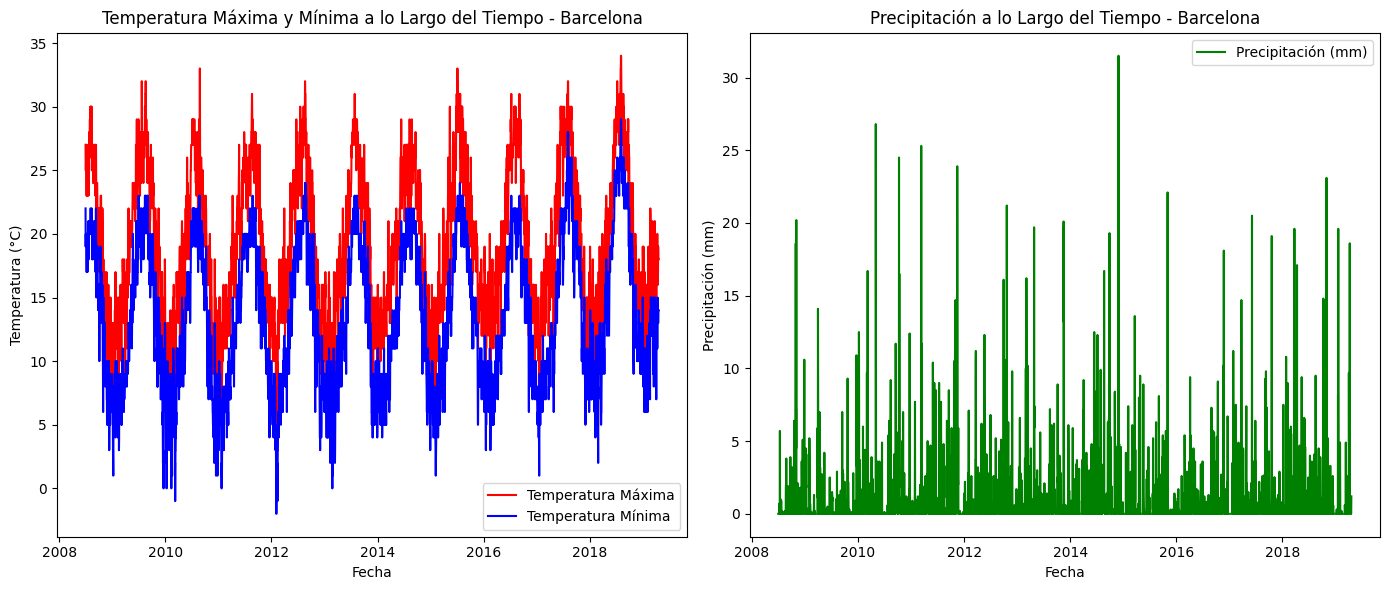

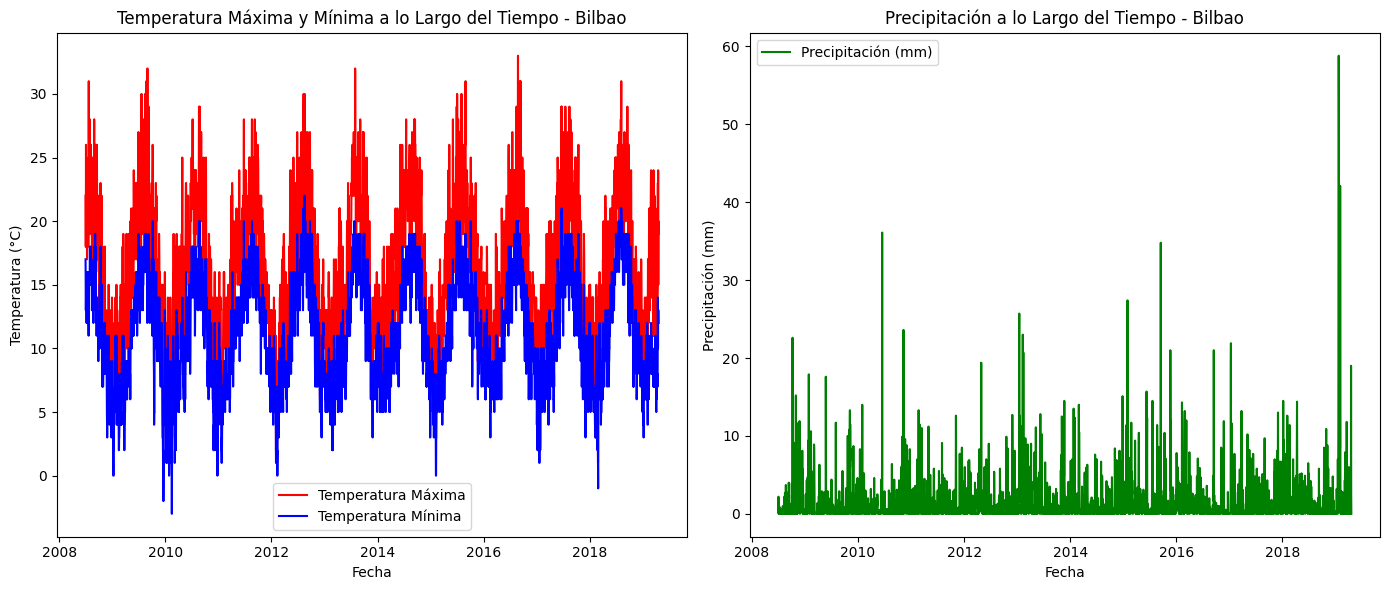

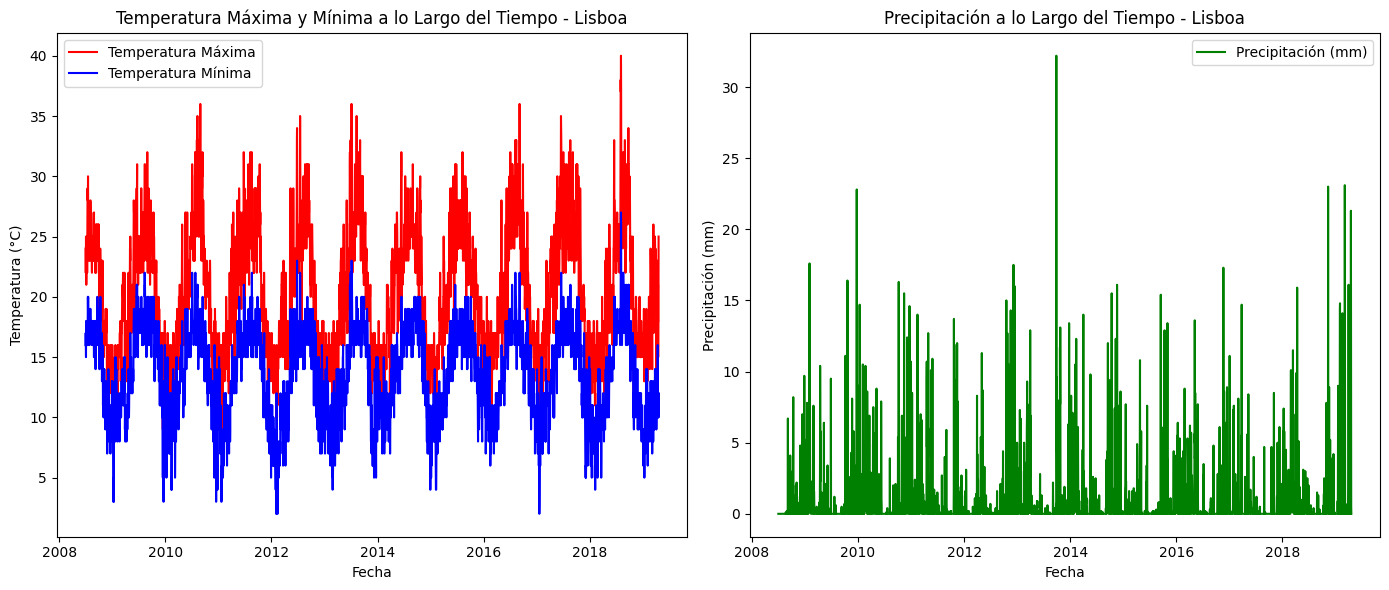

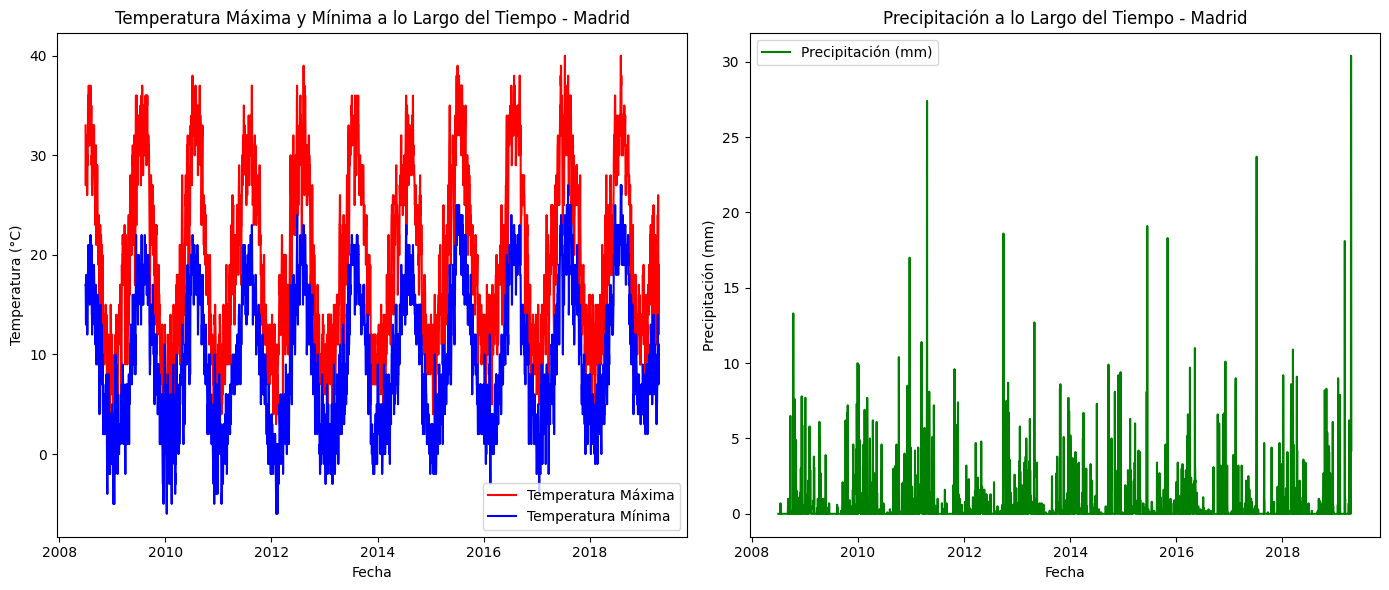

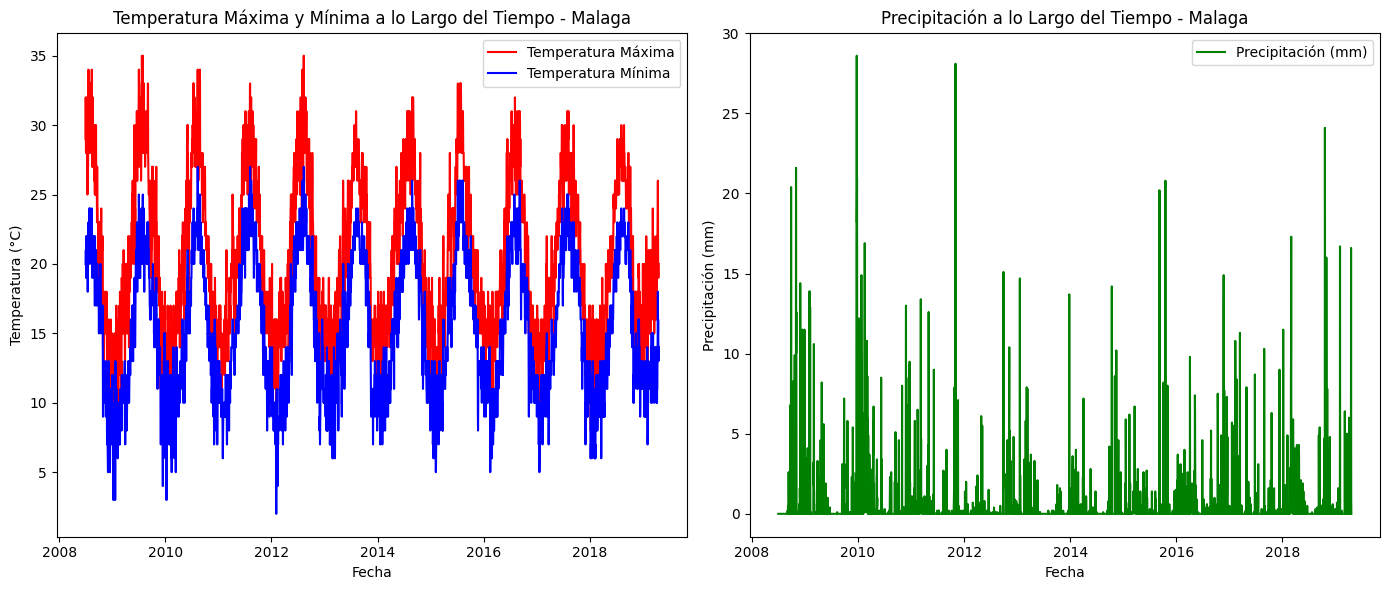

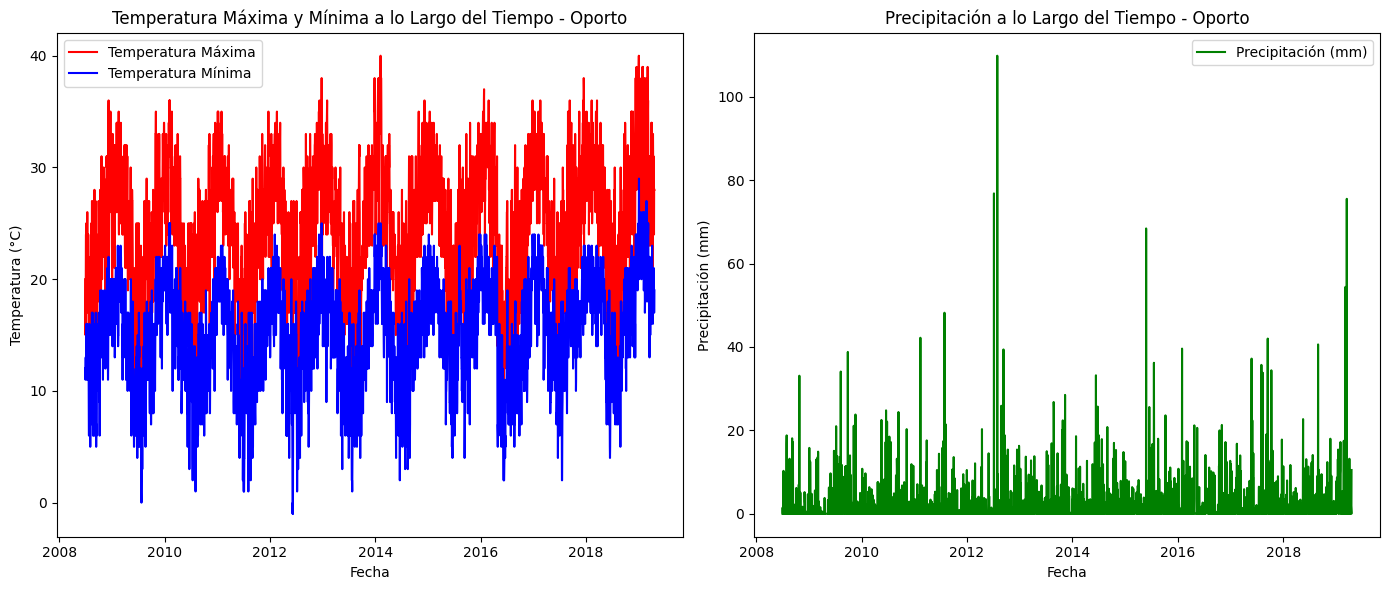

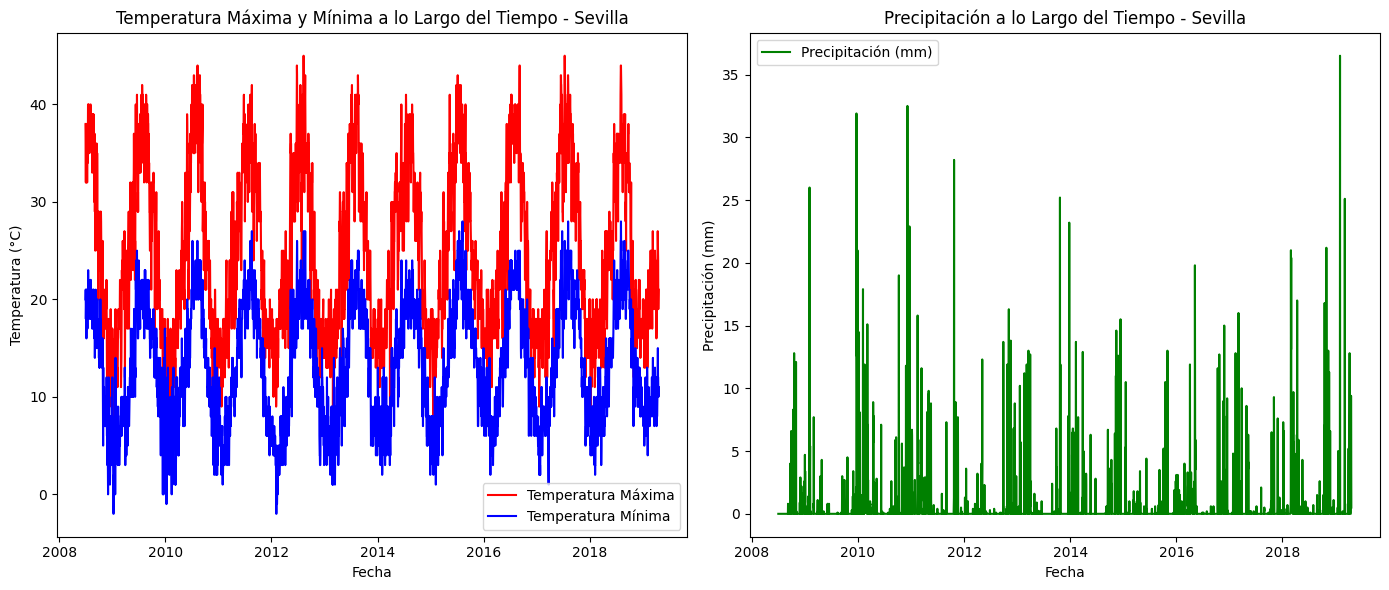

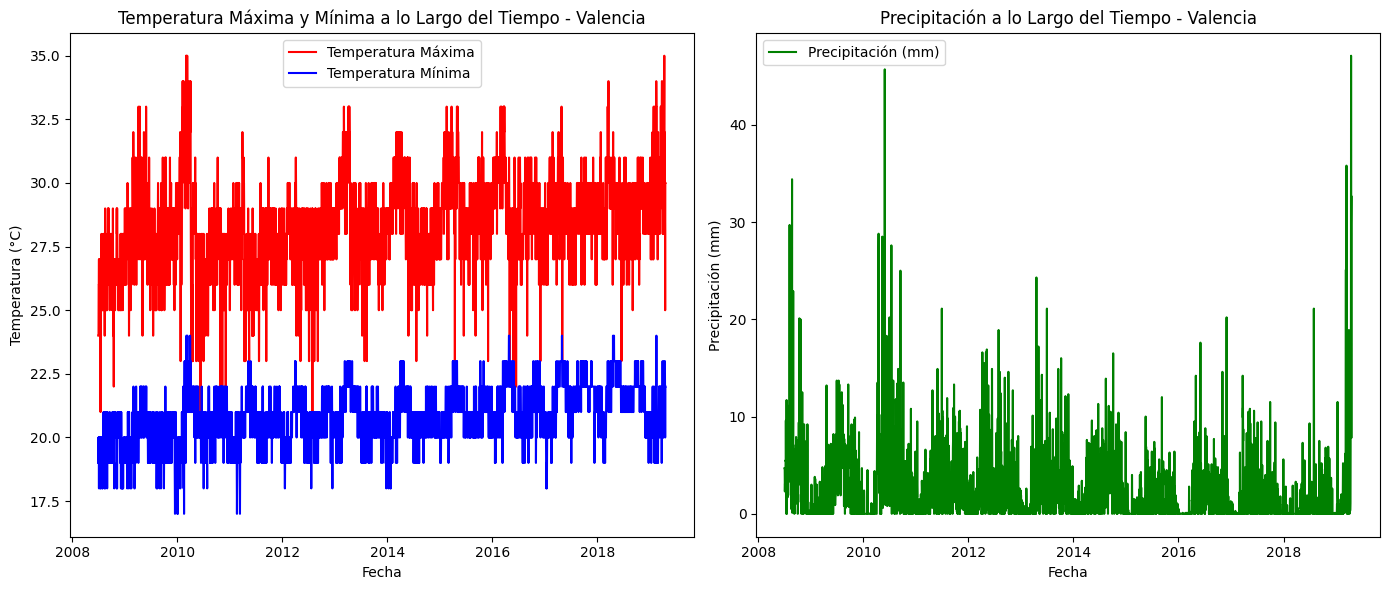

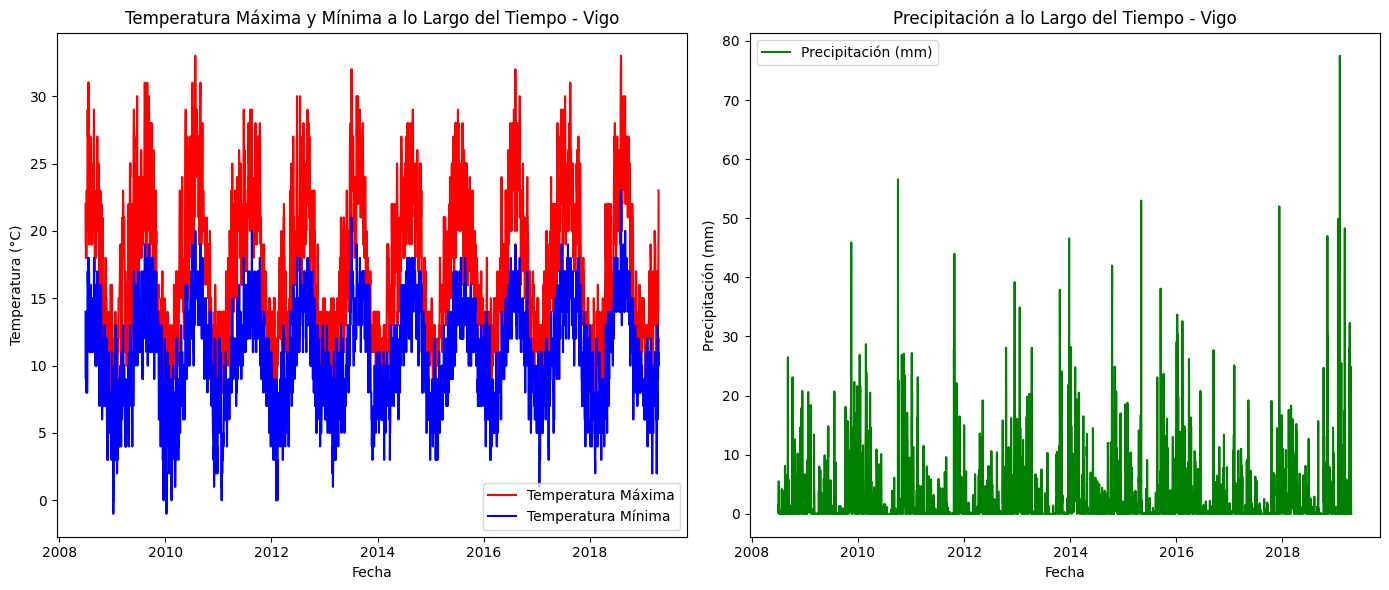

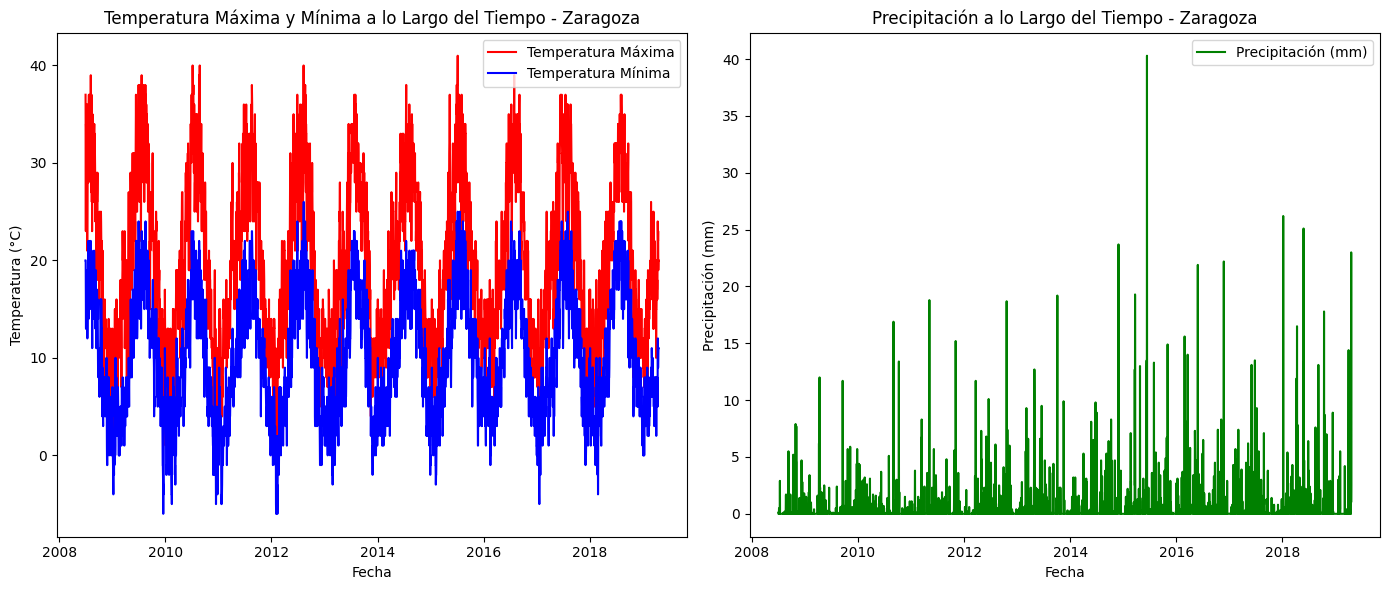

In [21]:
# Visualización de las tendencias temporales de la temperatura y la precipitación para cada ciudad
for city, data in grouped:
    plt.figure(figsize=(14, 6))
    
    # Temperaturas a lo largo del tiempo
    plt.subplot(1, 2, 1)
    plt.plot(data['date_time'], data['maxtempC'], label='Temperatura Máxima', color='r')
    plt.plot(data['date_time'], data['mintempC'], label='Temperatura Mínima', color='b')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.title(f'Temperatura Máxima y Mínima a lo Largo del Tiempo - {city}')

    # Precipitación a lo largo del tiempo
    plt.subplot(1, 2, 2)
    plt.plot(data['date_time'], data['precipMM'], label='Precipitación (mm)', color='g')
    plt.xlabel('Fecha')
    plt.ylabel('Precipitación (mm)')
    plt.legend()
    plt.title(f'Precipitación a lo Largo del Tiempo - {city}')

    plt.tight_layout()
    plt.show()


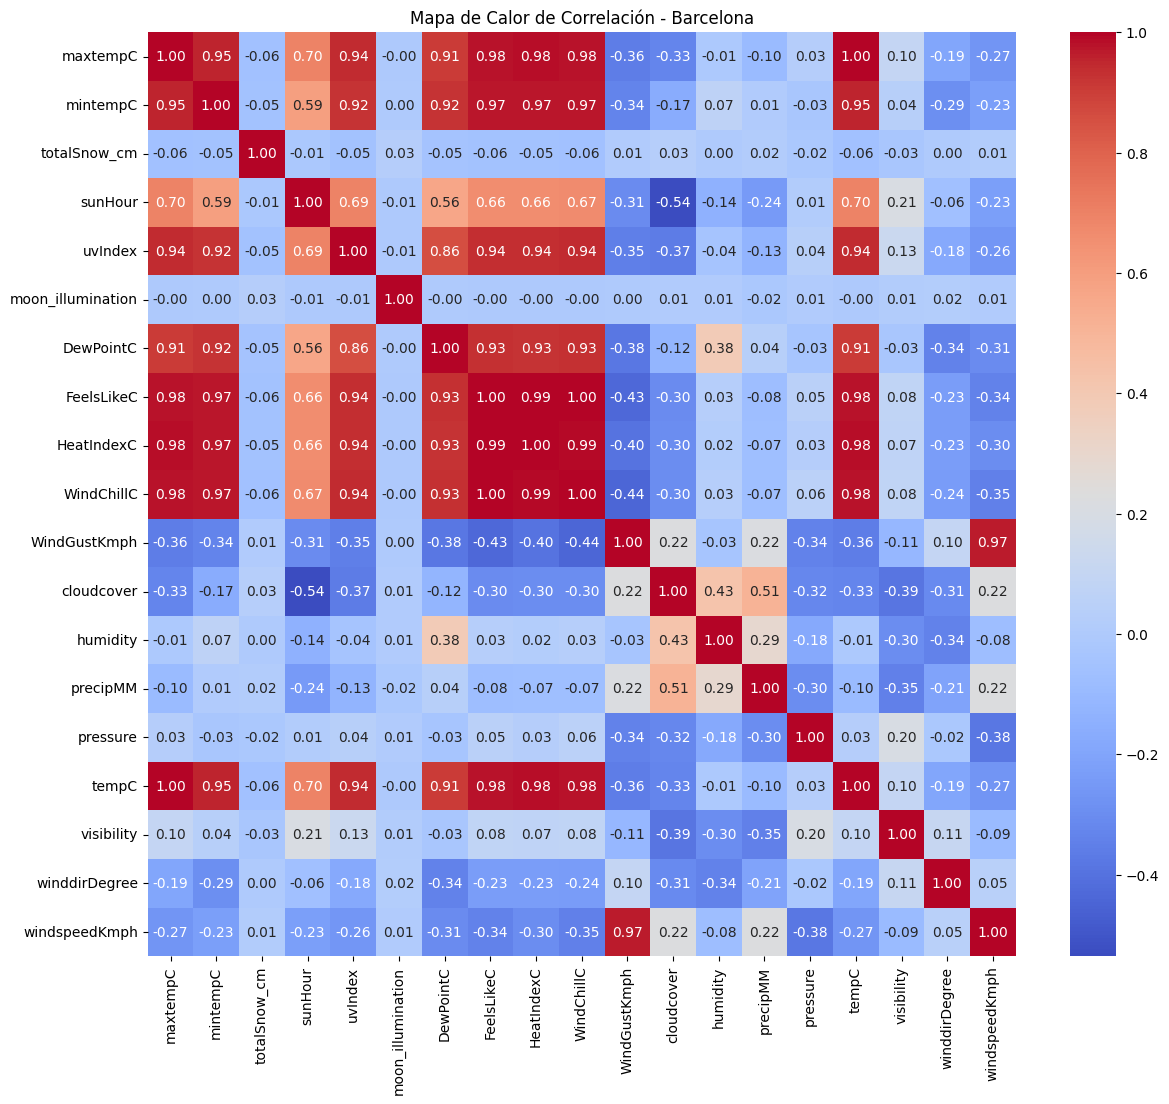

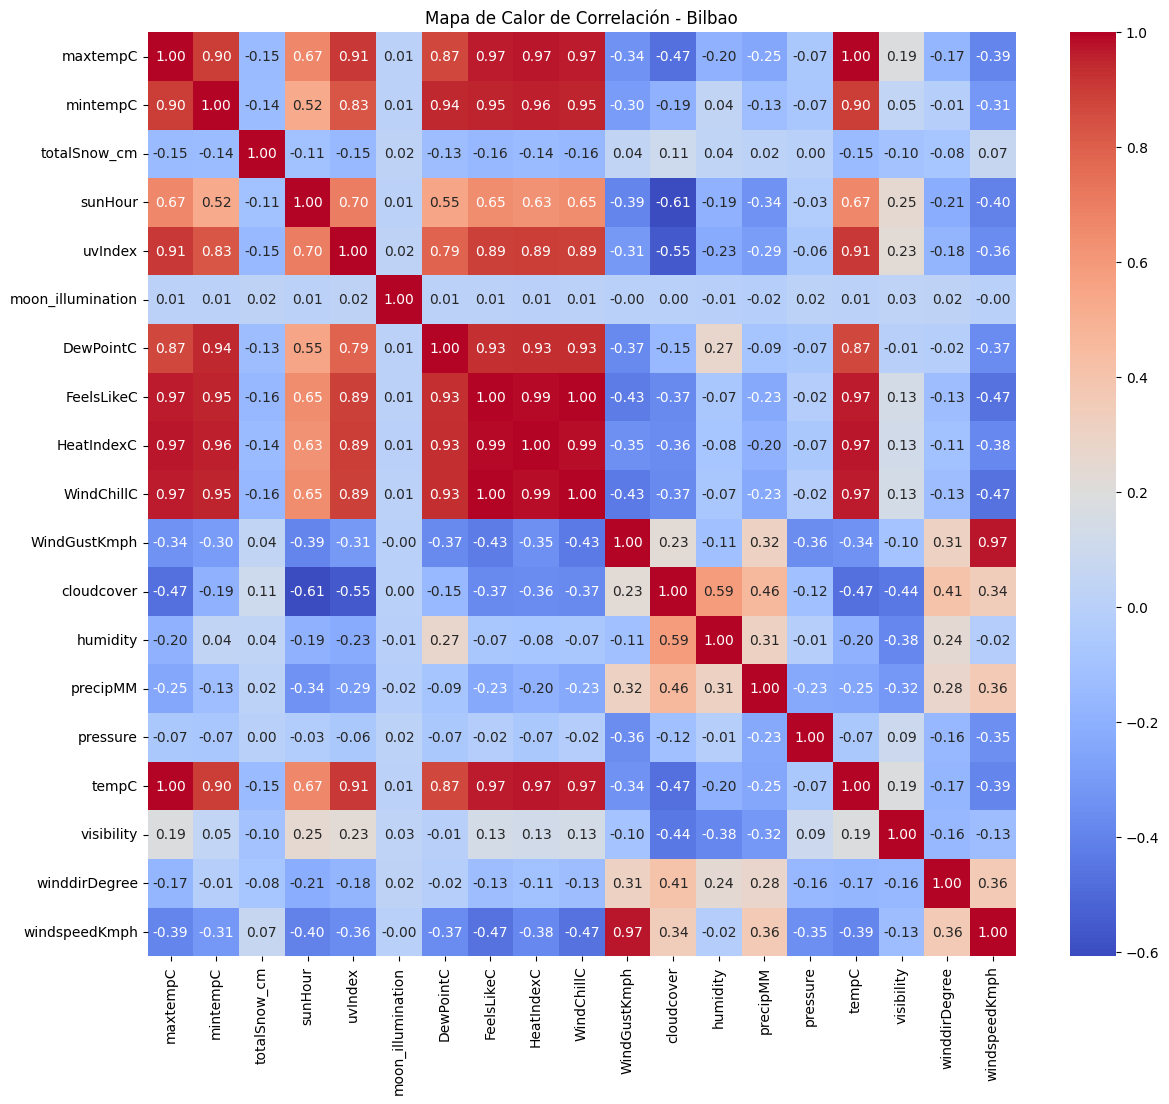

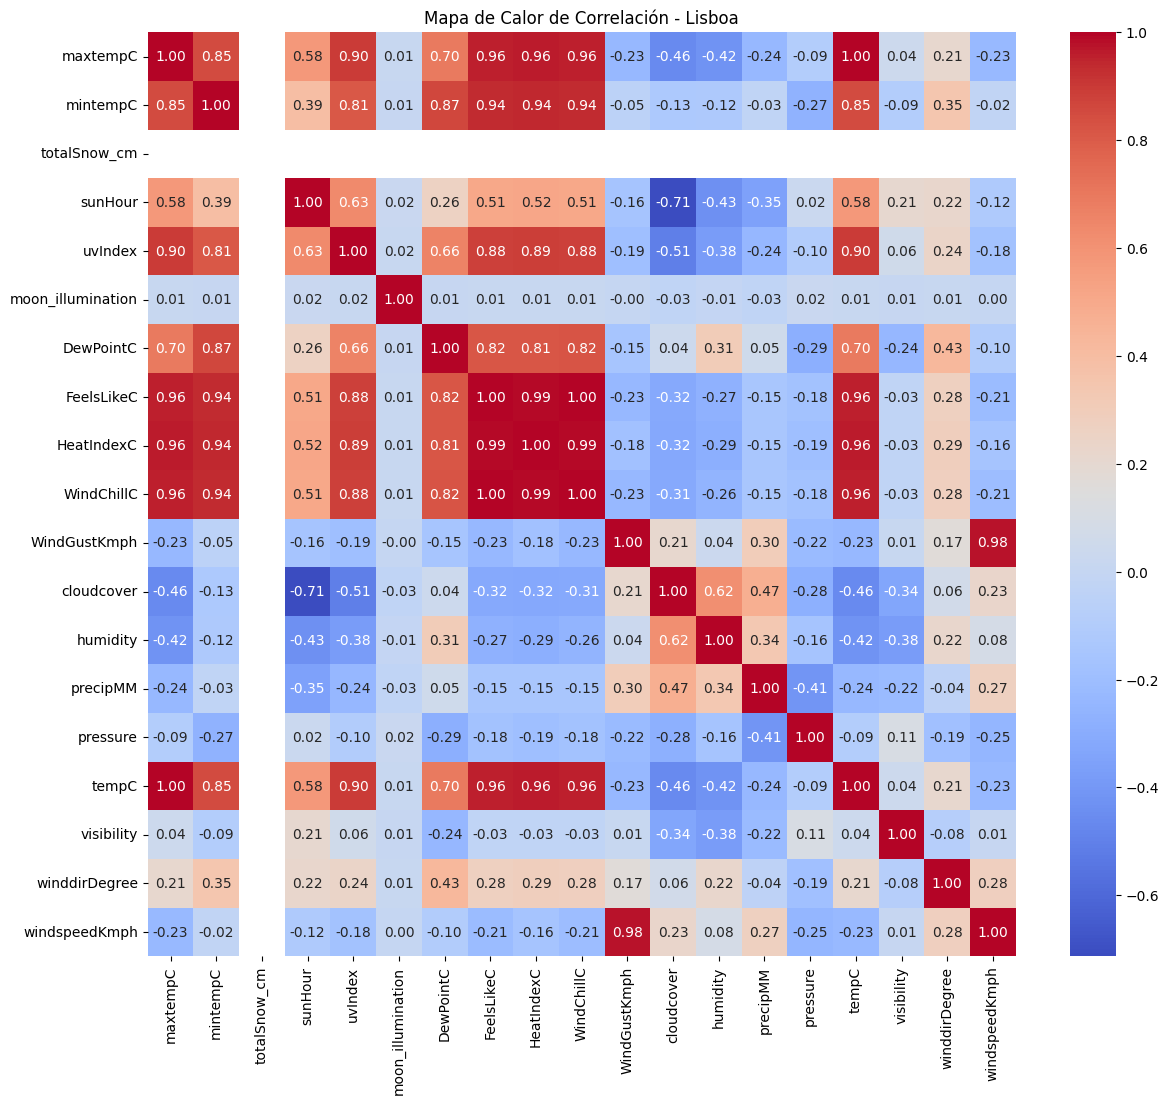

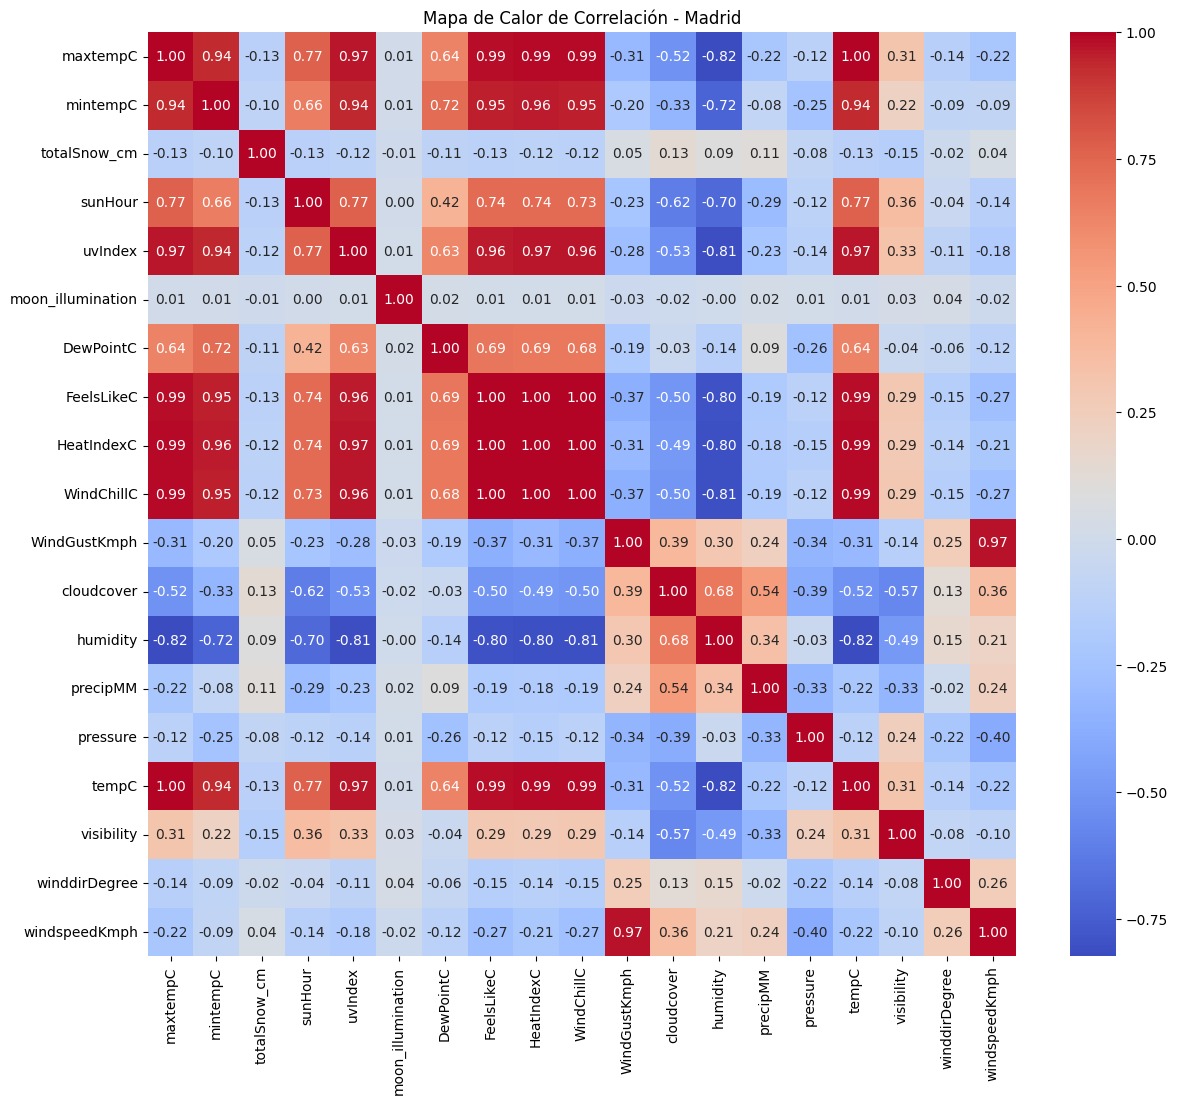

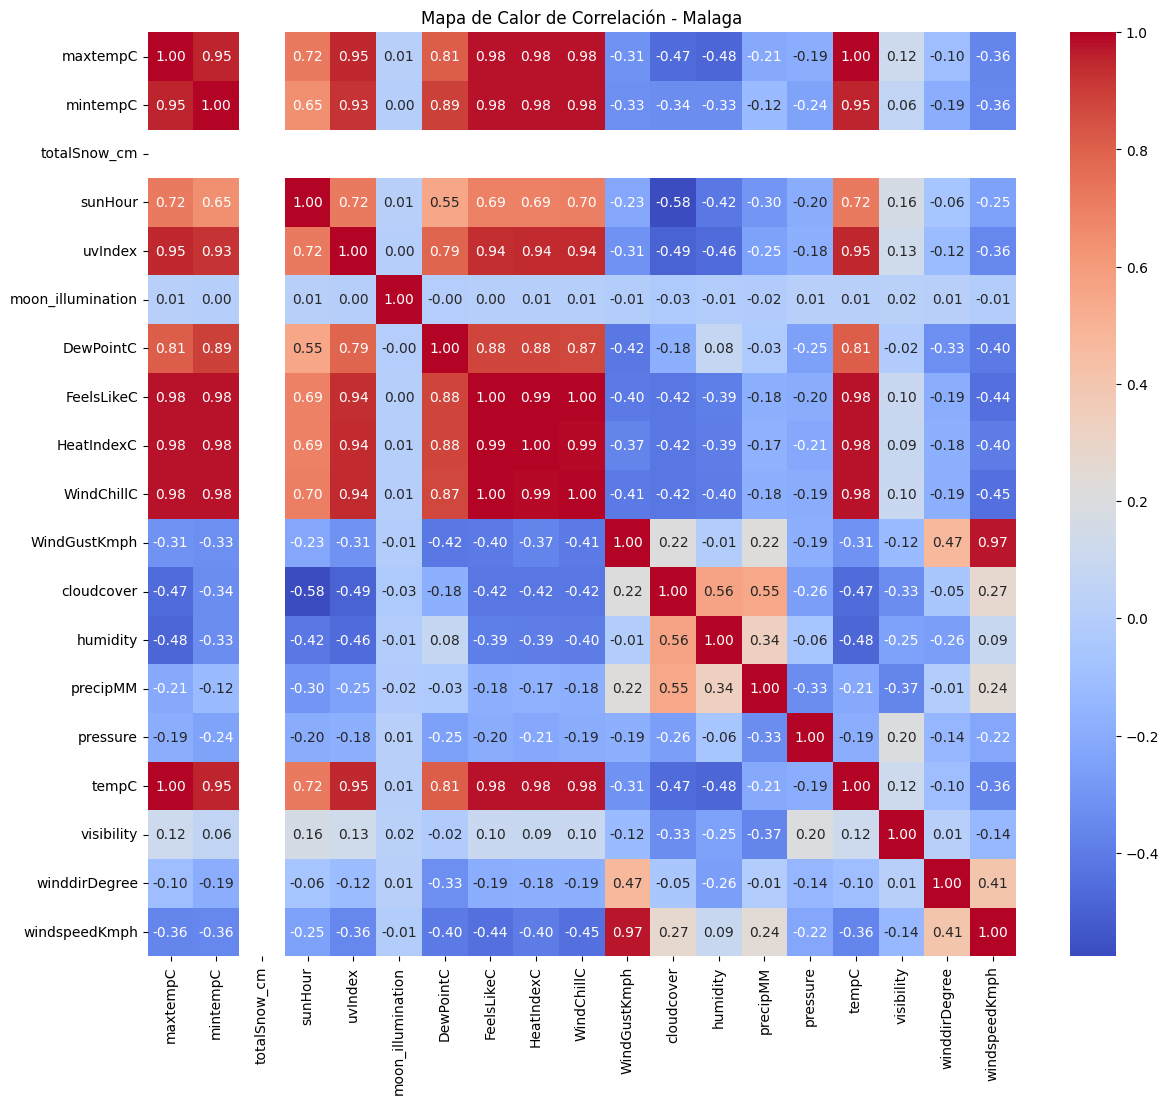

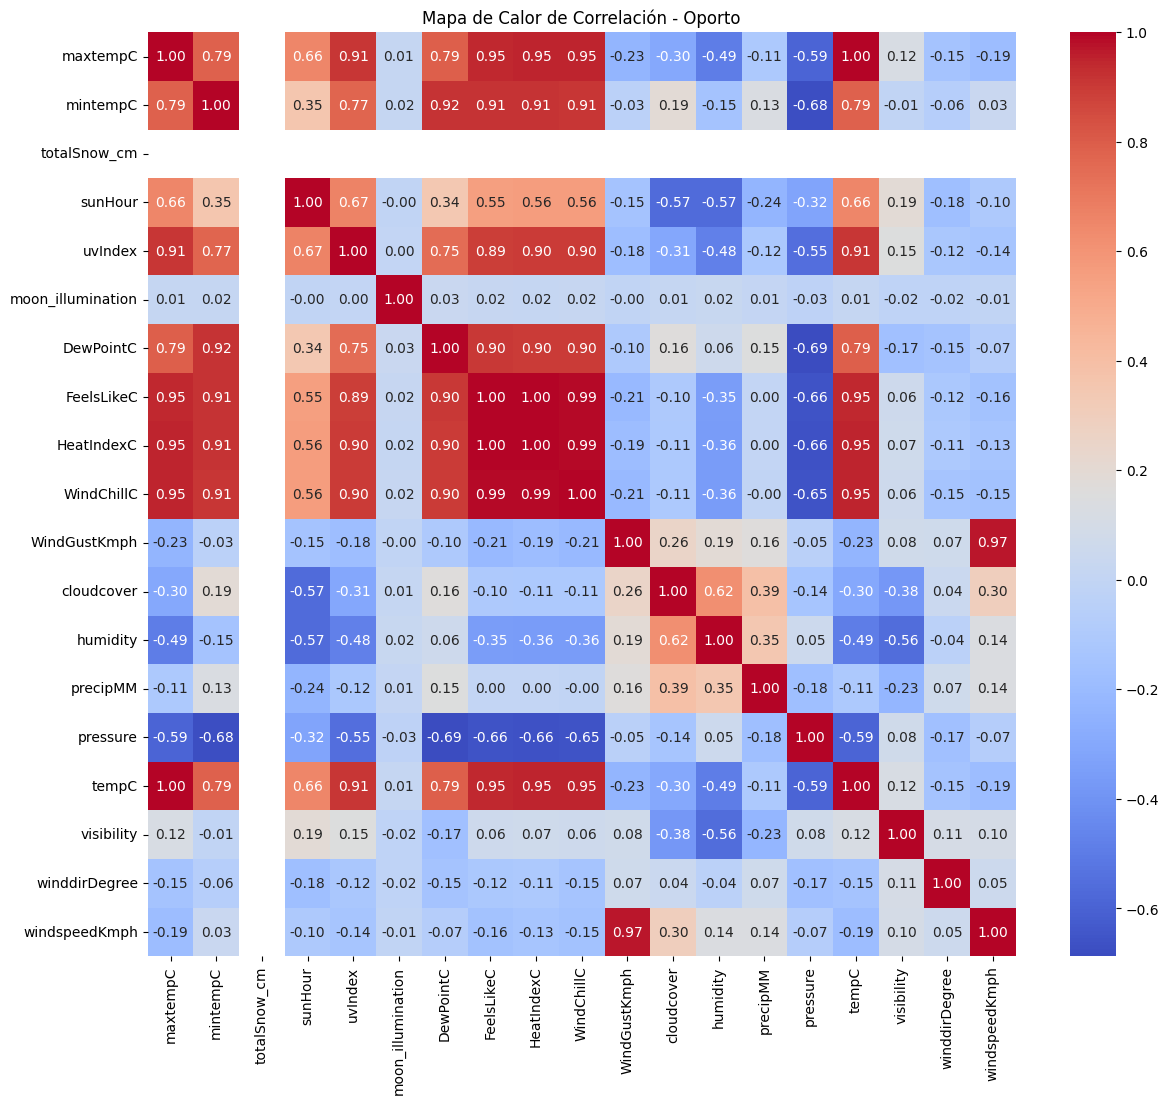

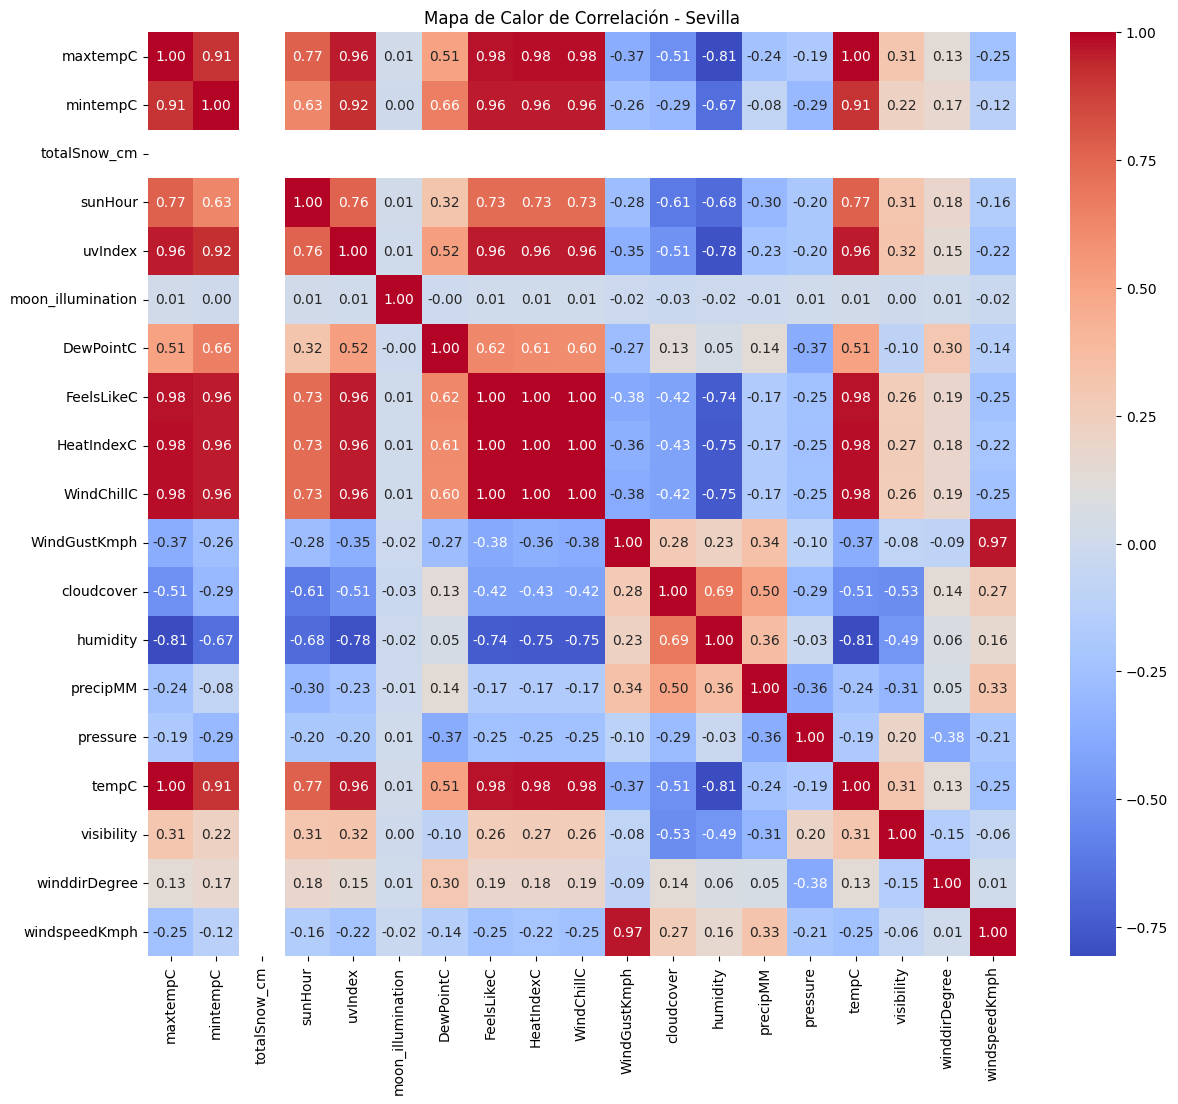

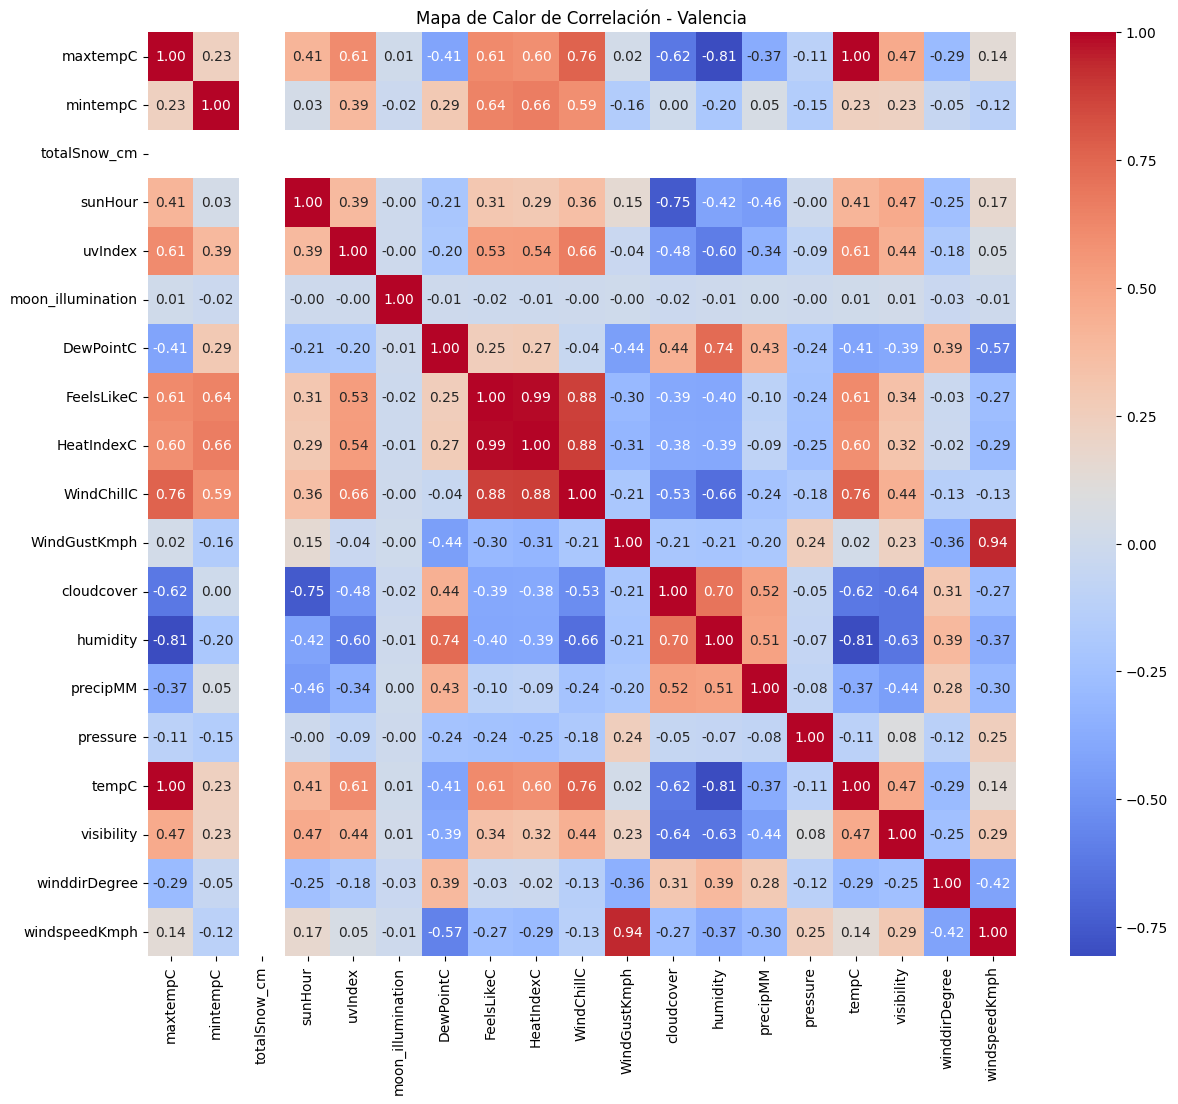

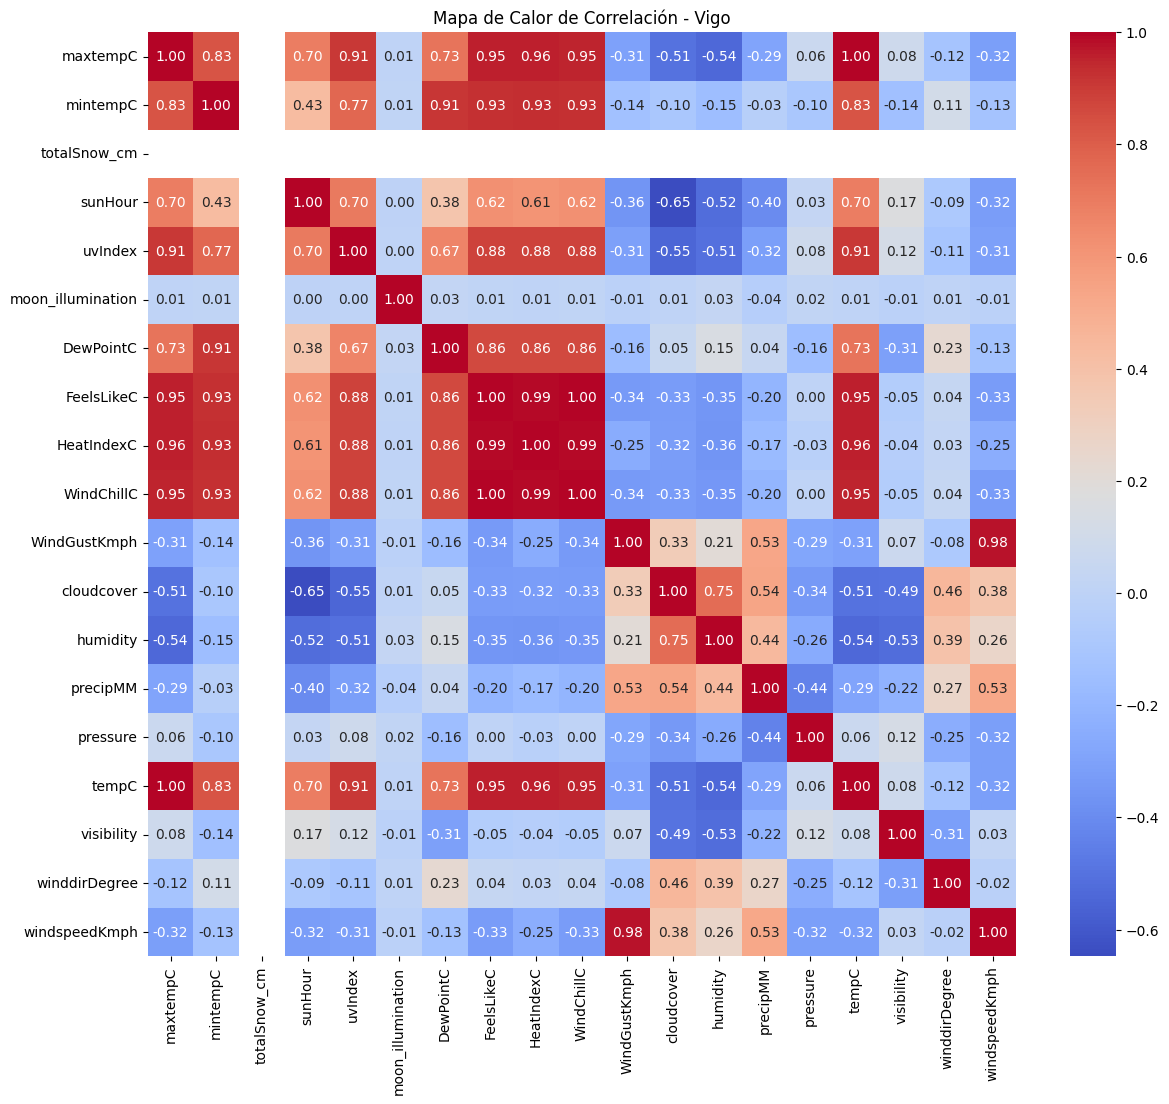

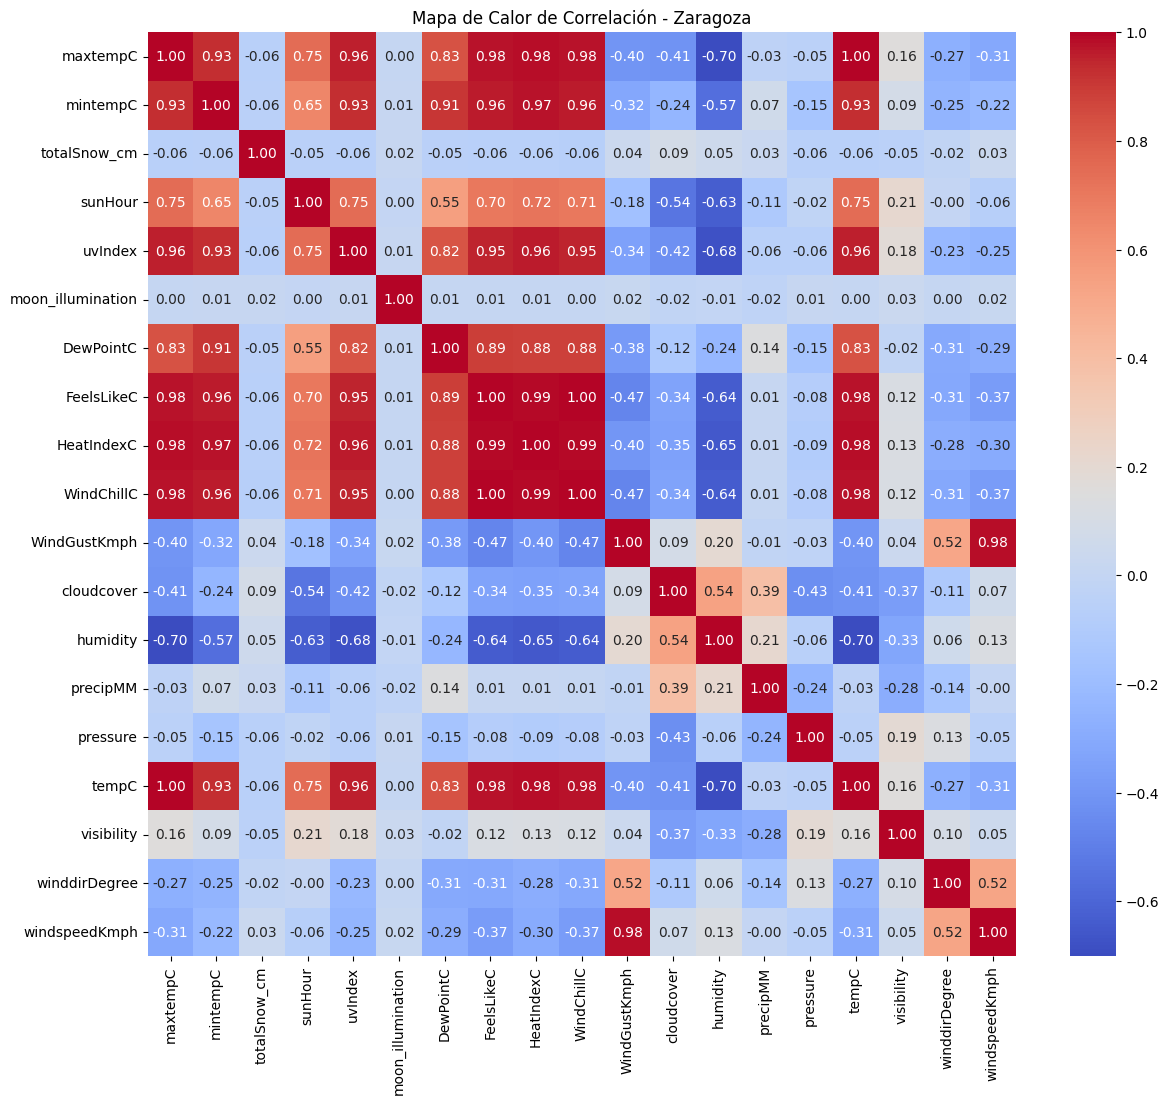

In [25]:
# Crear un mapa de calor de correlación para cada ciudad
for city, data in grouped:
    plt.figure(figsize=(14, 12))
    
    # Excluir las columnas no numéricas
    numerical_data = data.select_dtypes(include=['float64', 'int64'])
    
    sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Mapa de Calor de Correlación - {city}')
    plt.show()

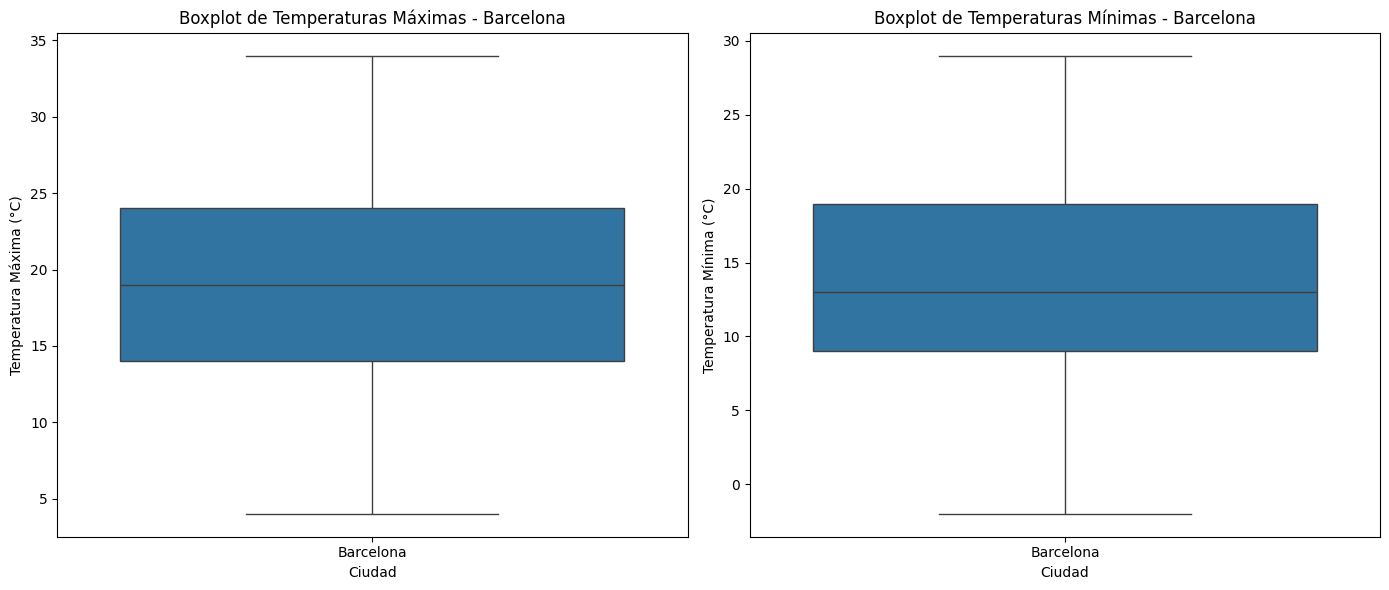

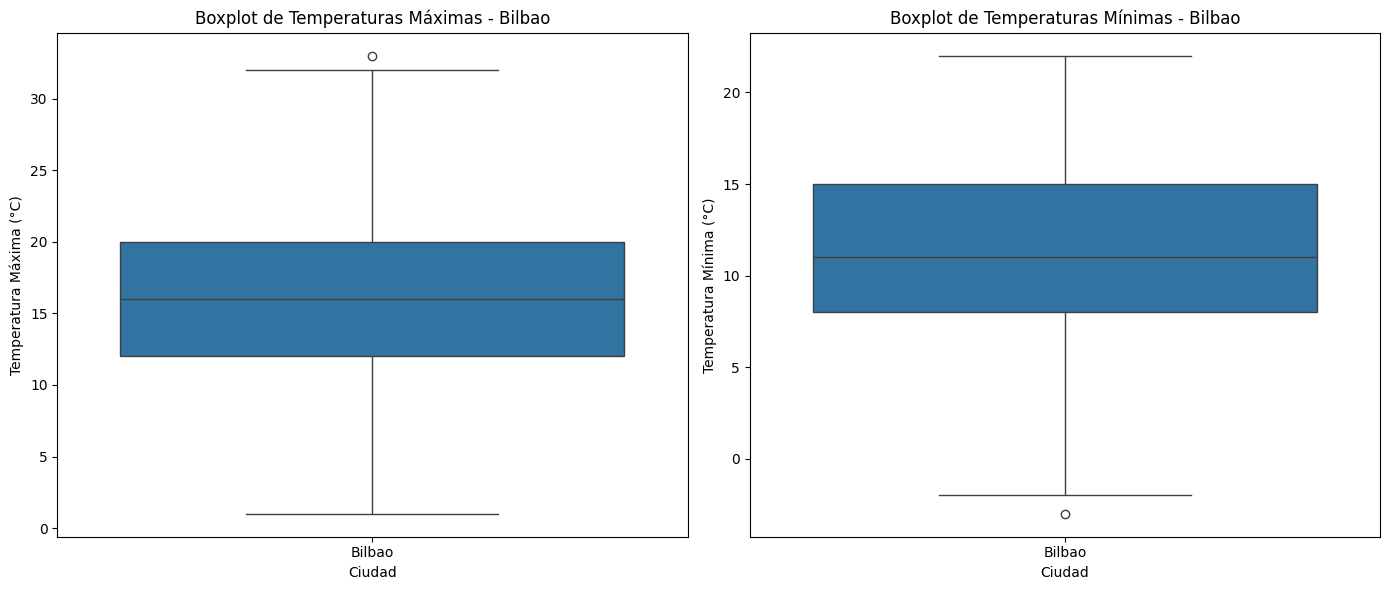

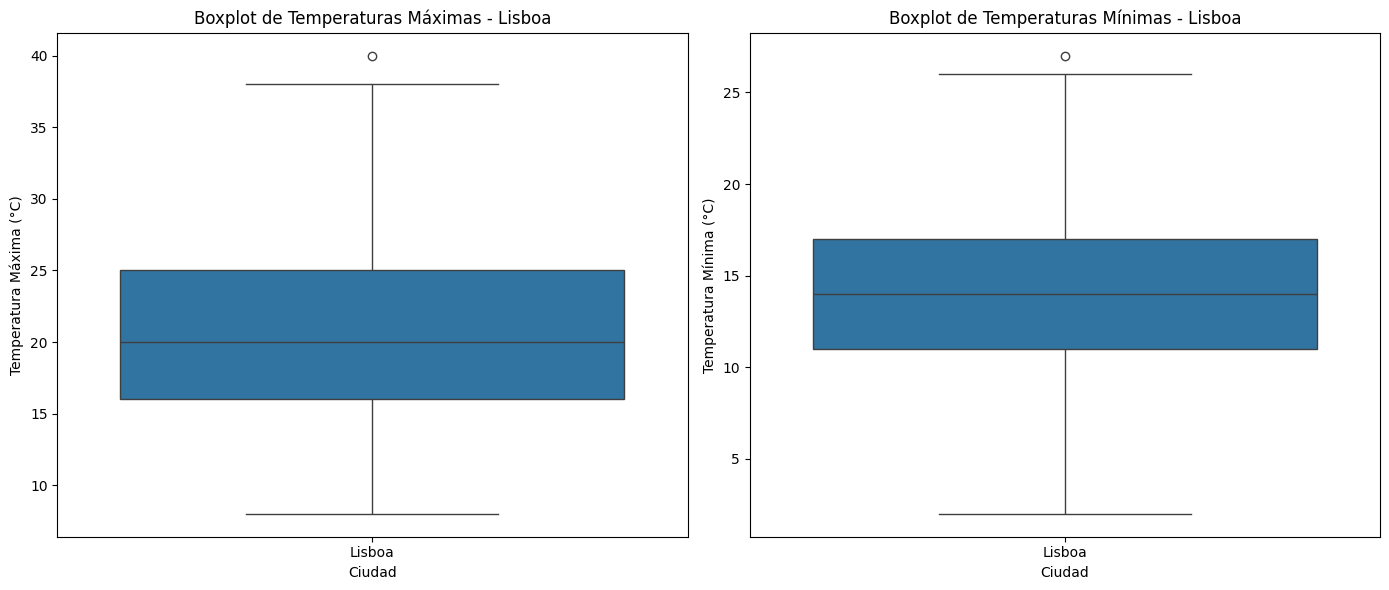

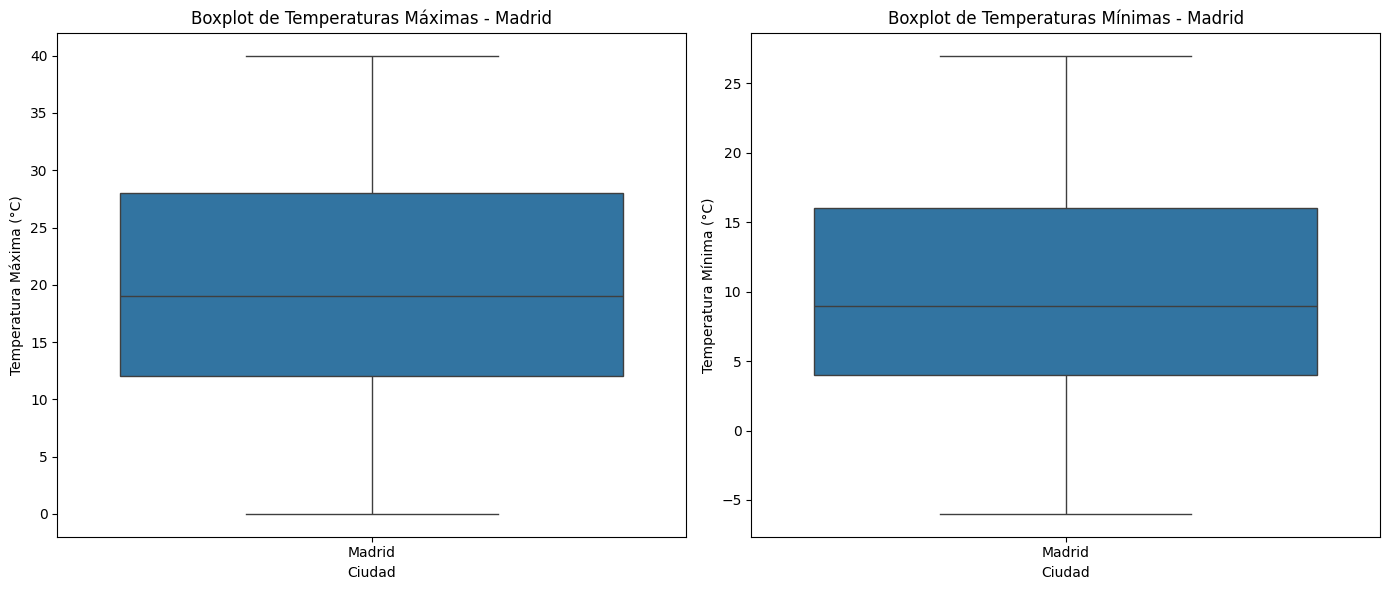

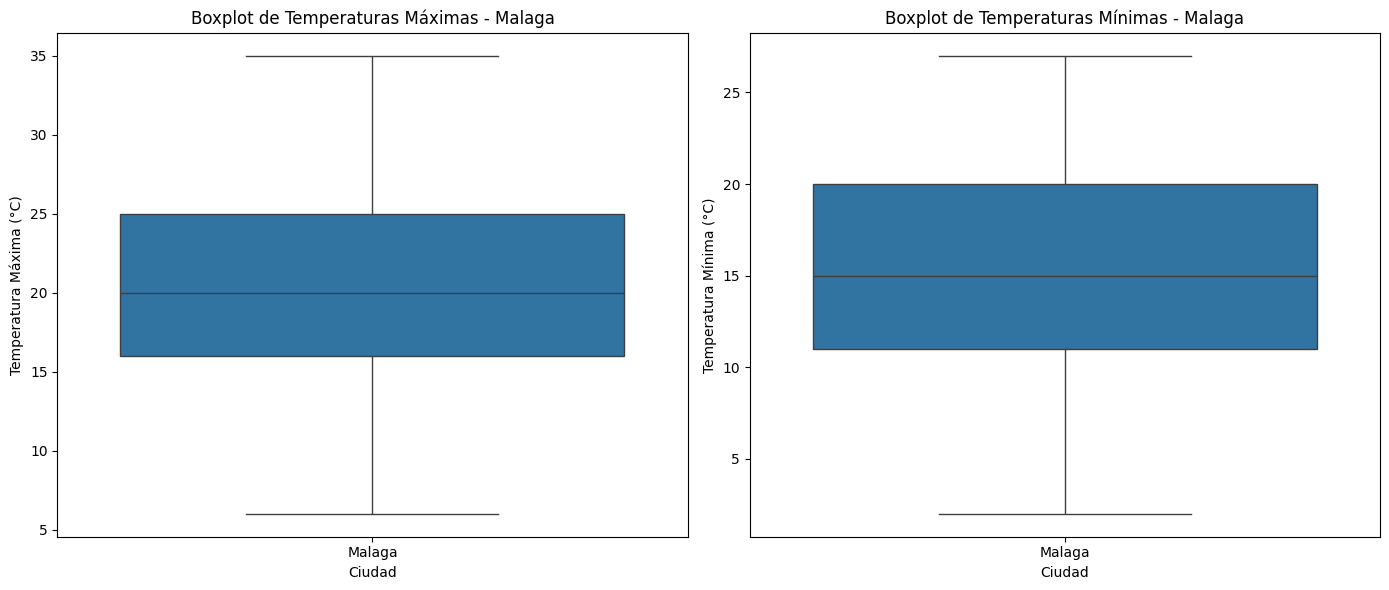

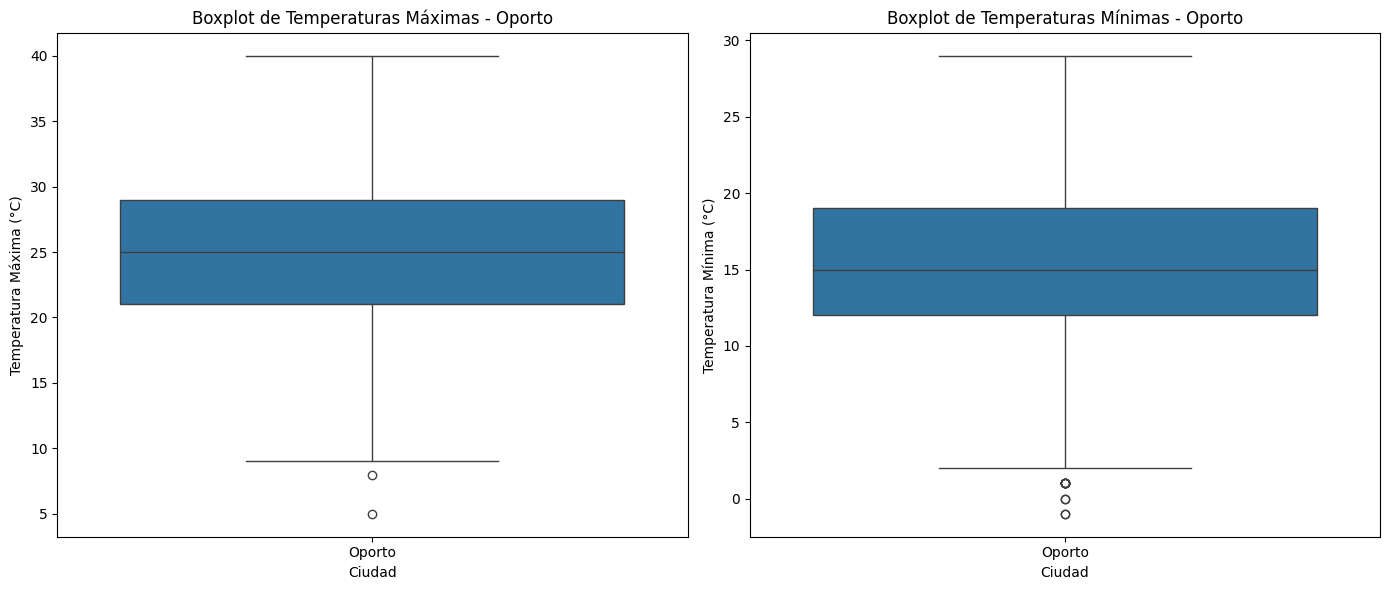

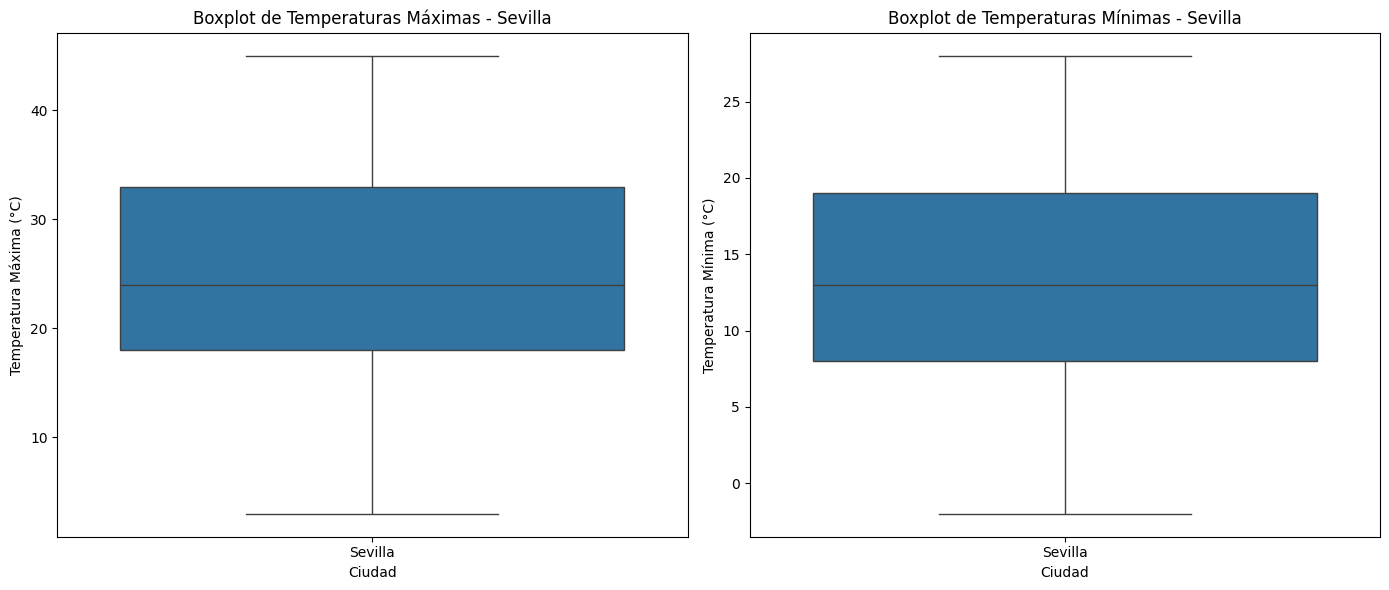

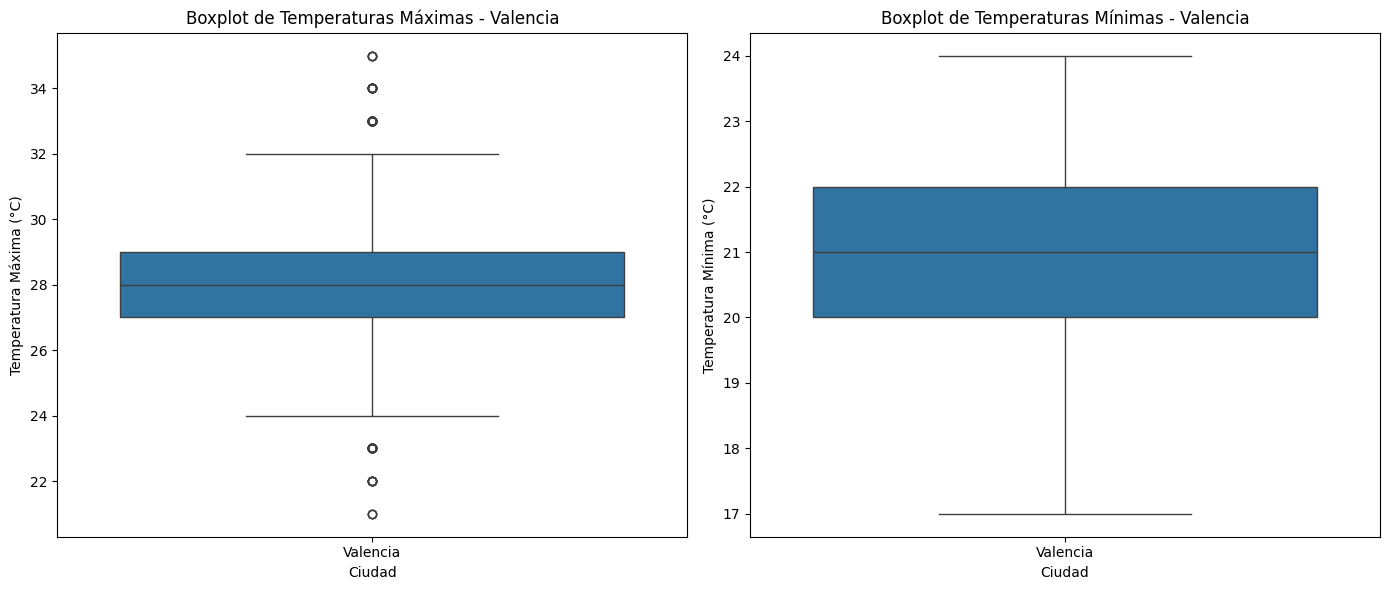

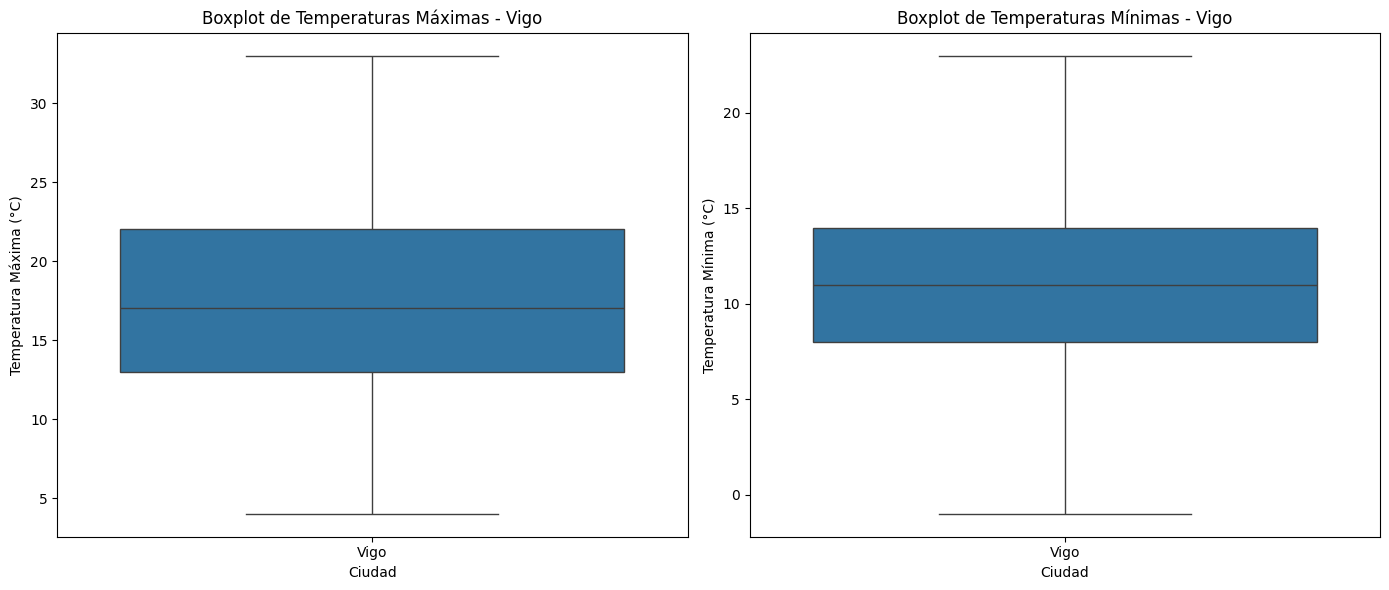

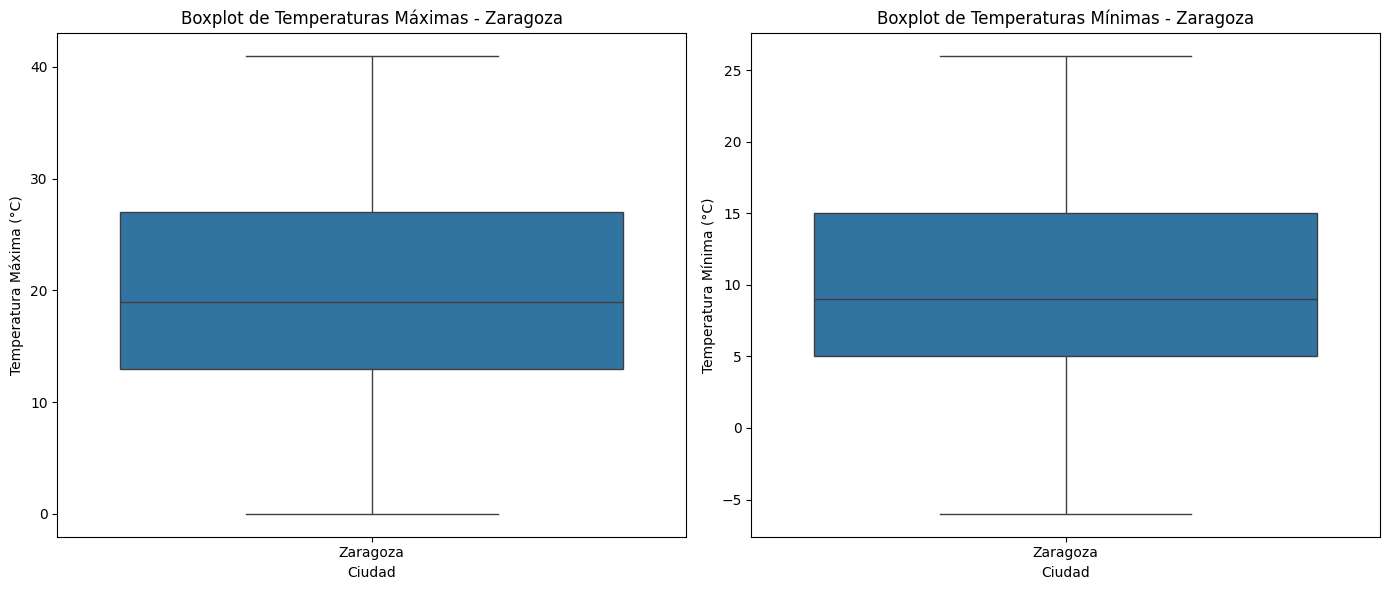

In [28]:
for city, data in grouped:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x='city', y='maxtempC', data=data)
    plt.title(f'Boxplot de Temperaturas Máximas - {city}')
    plt.xlabel('Ciudad')
    plt.ylabel('Temperatura Máxima (°C)')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='city', y='mintempC', data=data)
    plt.title(f'Boxplot de Temperaturas Mínimas - {city}')
    plt.xlabel('Ciudad')
    plt.ylabel('Temperatura Mínima (°C)')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_682/1332920260.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['maxtempC'], label='Temperatura Máxima', shade=True)


/tmp/ipykernel_682/1332920260.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['mintempC'], label='Temperatura Mínima', shade=True)


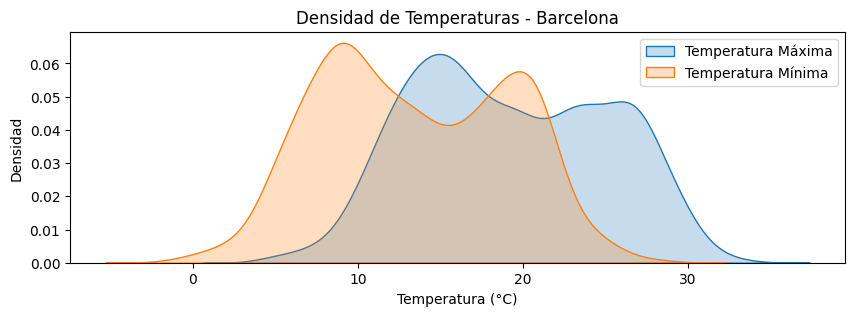

/tmp/ipykernel_682/1332920260.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['maxtempC'], label='Temperatura Máxima', shade=True)
/tmp/ipykernel_682/1332920260.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['mintempC'], label='Temperatura Mínima', shade=True)


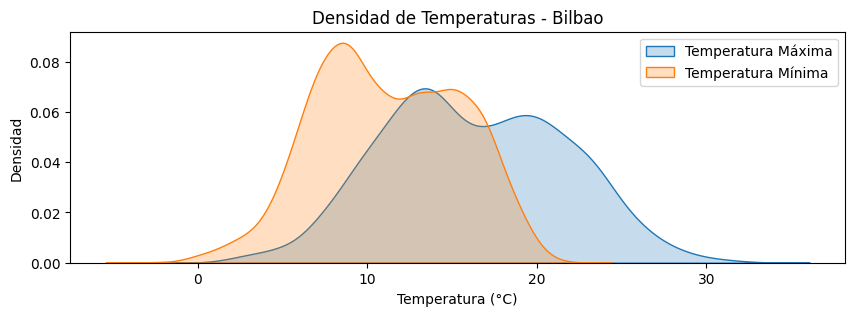

/tmp/ipykernel_682/1332920260.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['maxtempC'], label='Temperatura Máxima', shade=True)
/tmp/ipykernel_682/1332920260.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['mintempC'], label='Temperatura Mínima', shade=True)


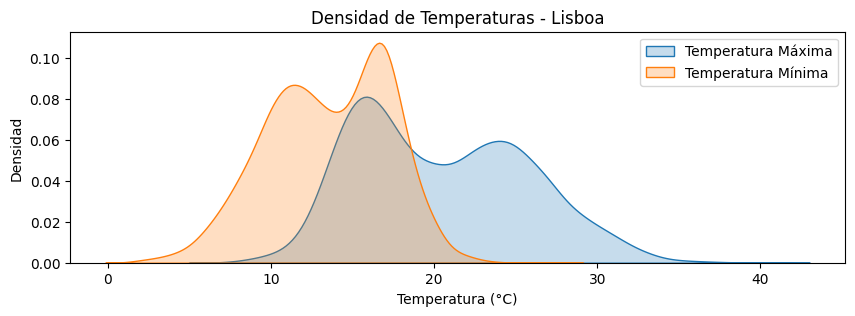

/tmp/ipykernel_682/1332920260.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['maxtempC'], label='Temperatura Máxima', shade=True)
/tmp/ipykernel_682/1332920260.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['mintempC'], label='Temperatura Mínima', shade=True)


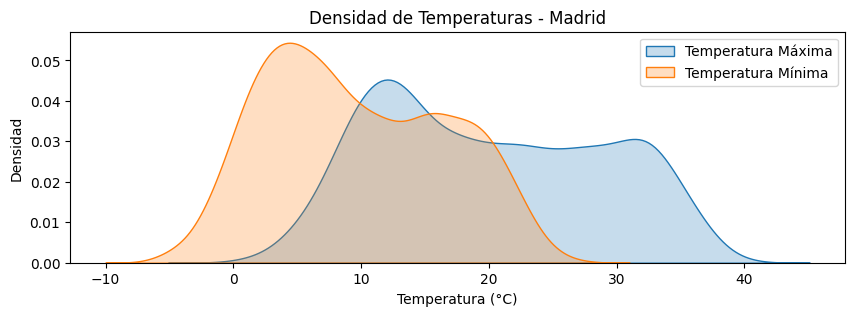

/tmp/ipykernel_682/1332920260.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['maxtempC'], label='Temperatura Máxima', shade=True)
/tmp/ipykernel_682/1332920260.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['mintempC'], label='Temperatura Mínima', shade=True)


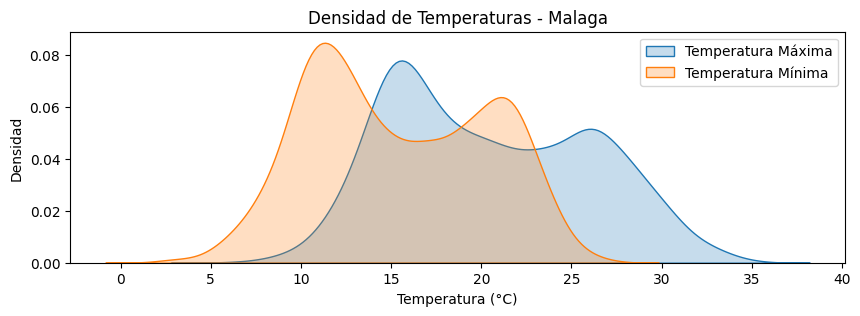

/tmp/ipykernel_682/1332920260.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['maxtempC'], label='Temperatura Máxima', shade=True)
/tmp/ipykernel_682/1332920260.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['mintempC'], label='Temperatura Mínima', shade=True)


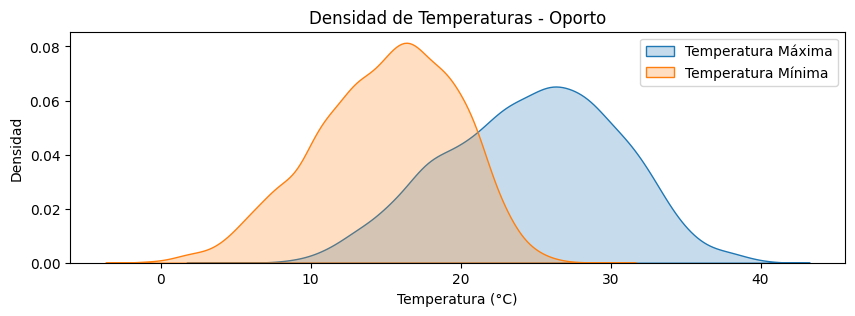

/tmp/ipykernel_682/1332920260.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['maxtempC'], label='Temperatura Máxima', shade=True)
/tmp/ipykernel_682/1332920260.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['mintempC'], label='Temperatura Mínima', shade=True)


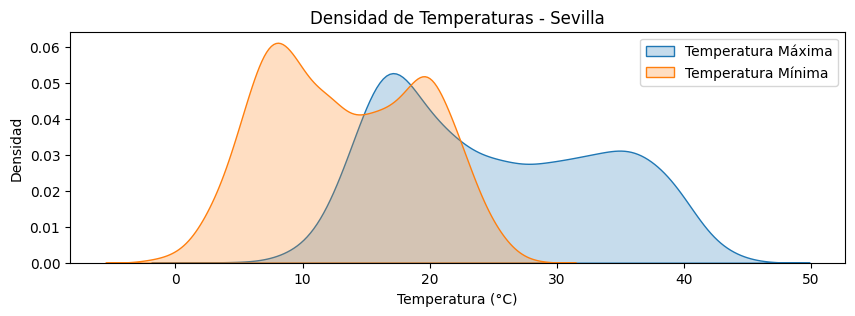

/tmp/ipykernel_682/1332920260.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['maxtempC'], label='Temperatura Máxima', shade=True)
/tmp/ipykernel_682/1332920260.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['mintempC'], label='Temperatura Mínima', shade=True)


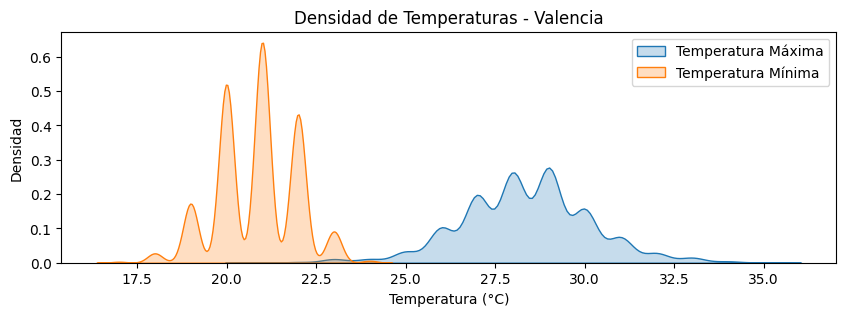

/tmp/ipykernel_682/1332920260.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['maxtempC'], label='Temperatura Máxima', shade=True)
/tmp/ipykernel_682/1332920260.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['mintempC'], label='Temperatura Mínima', shade=True)


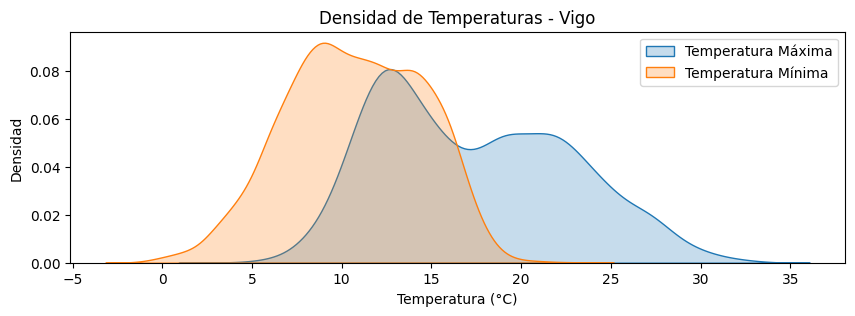

/tmp/ipykernel_682/1332920260.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['maxtempC'], label='Temperatura Máxima', shade=True)
/tmp/ipykernel_682/1332920260.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['mintempC'], label='Temperatura Mínima', shade=True)


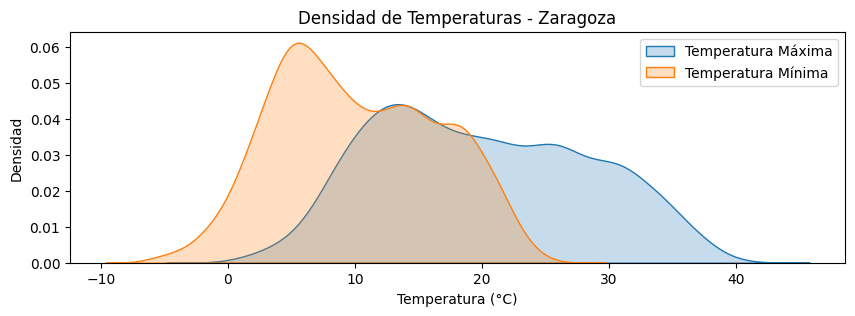

In [32]:
# Gráficos de densidad para temperaturas máximas y mínimas por ciudad
for city, data in grouped:
    plt.figure(figsize=(10, 3))

    sns.kdeplot(data['maxtempC'], label='Temperatura Máxima', shade=True)
    sns.kdeplot(data['mintempC'], label='Temperatura Mínima', shade=True)
    plt.title(f'Densidad de Temperaturas - {city}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()

Valores atípicos para Barcelona:
       maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  moon_illumination  \
6           24        19           0.0     14.5        6                 25   
10          26        19           0.0     14.5        6                 54   
11          24        20           0.0     13.5        6                 61   
20          23        20           0.0     14.5        6                 73   
52          27        20           0.0     11.6        6                 55   
...        ...       ...           ...      ...      ...                ...   
3931        16        11           0.0     11.6        4                  6   
3934        17        13           0.0      7.8        4                 29   
3943        18        13           0.0     10.4        4                 97   
3944        18        14           0.0     10.4        4                100   
3945        18        14           0.0      9.1        4                 88   

      DewPointC  

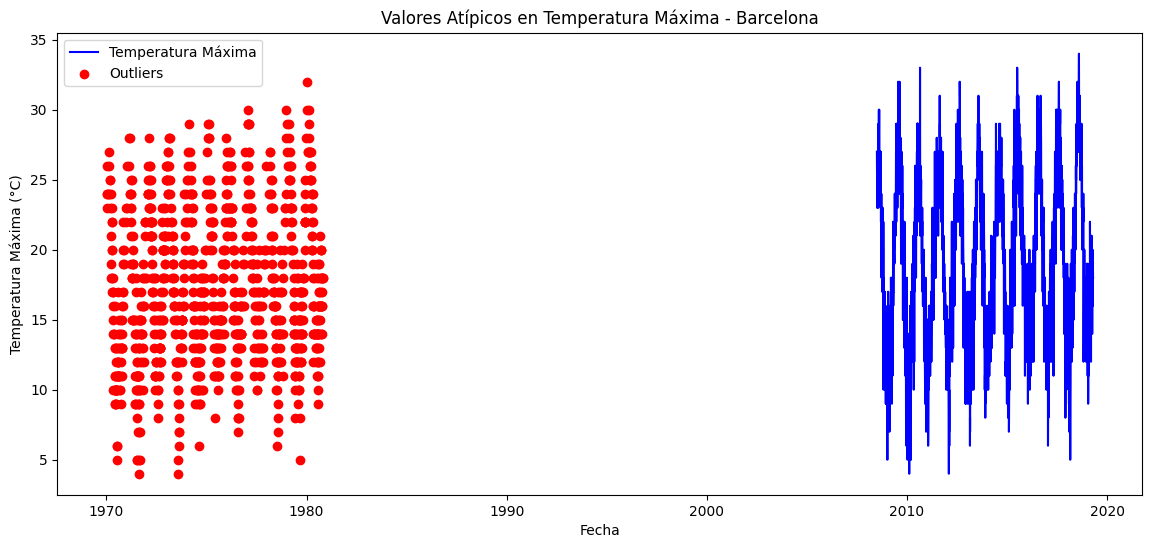

Valores atípicos para Bilbao:
       maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  moon_illumination  \
3950        18        16           0.0      9.5        4                 10   
3968        31        16           0.0     14.5        6                 59   
4012        24        19           0.0      7.8        5                 33   
4018        20        14           0.0      7.7        5                 78   
4039        14        12           0.0      7.2        3                 13   
...        ...       ...           ...      ...      ...                ...   
7875        16         5           0.0     10.3        4                  0   
7876        15         9           0.0      6.5        3                  0   
7877        16         6           0.0      7.8        3                  6   
7884        19         7           0.0     11.6        5                 59   
7889        15        13           0.0      6.7        3                 97   

      DewPointC  Fee

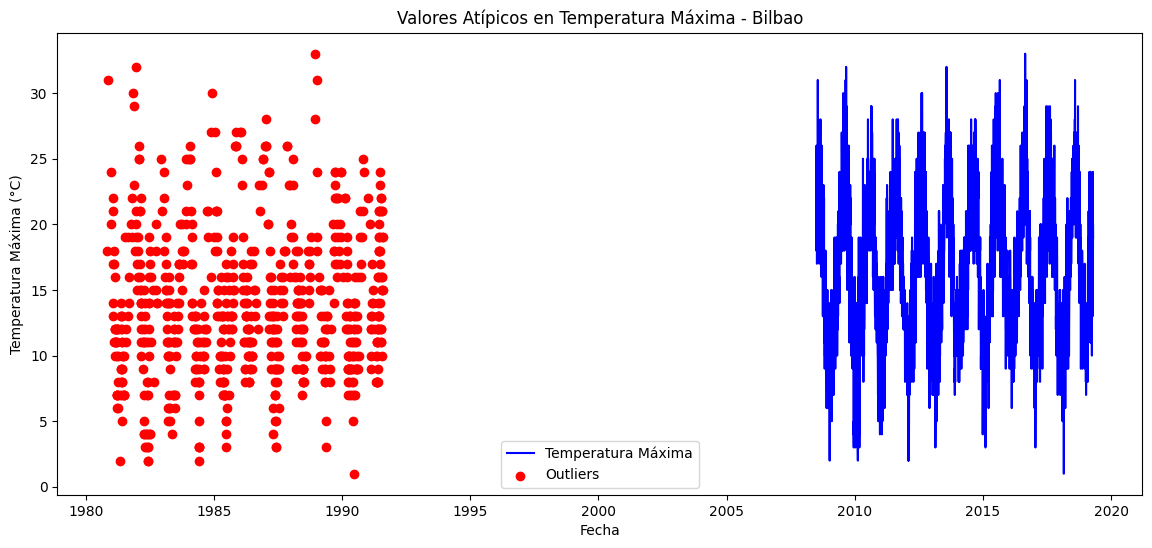

Valores atípicos para Lisboa:
        maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  moon_illumination  \
7892         24        16           0.0     14.5        6                  4   
7893         22        17           0.0     14.5        5                  0   
7894         22        16           0.0     14.5        5                  0   
7895         25        15           0.0     14.5        6                  3   
7896         24        18           0.0     14.5        6                 10   
...         ...       ...           ...      ...      ...                ...   
11831        23        16           0.0      9.1        4                 67   
11832        19        13           0.0      9.1        4                 74   
11834        15        10           0.0      6.8        3                 89   
11835        18        12           0.0      8.0        4                 97   
11836        18        10           0.0      6.8        3                100   

       D

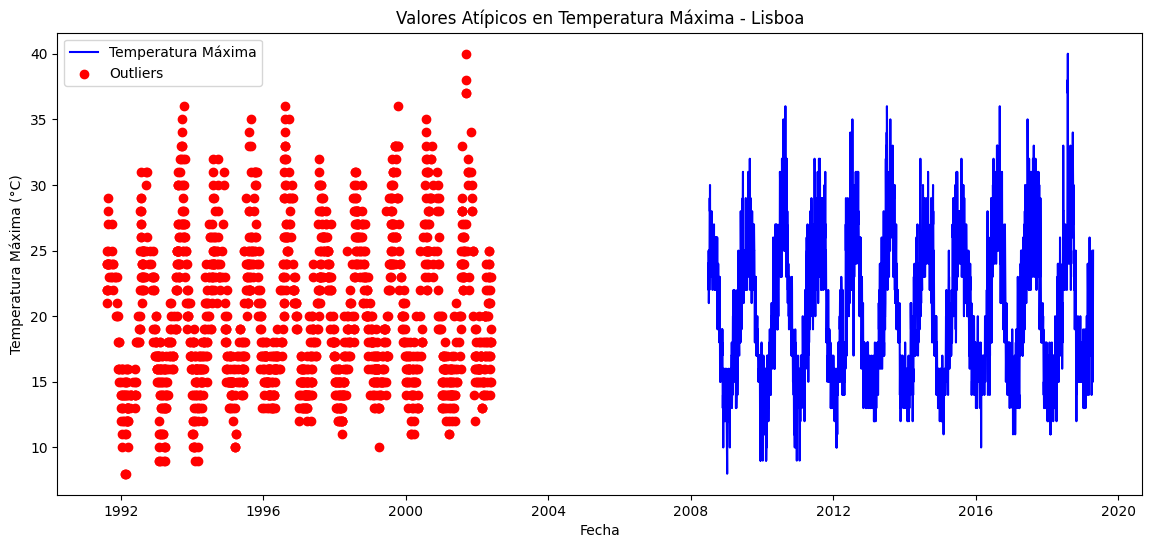

Valores atípicos para Madrid:
        maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  moon_illumination  \
11853        29        18           0.0     14.5        6                 90   
11904        23        15           0.0     11.6        5                 33   
11905        24        16           0.0     10.3        5                 40   
11908        30        17           0.0     11.6        5                 63   
11920        27        15           0.0     11.6        6                 47   
...         ...       ...           ...      ...      ...                ...   
15773        15         6           0.0      7.8        3                 36   
15780        26        11           0.0     10.4        5                 89   
15781        15        11           0.0      6.6        3                 97   
15782        12         7           0.0      6.6        3                100   
15783        19        11           0.0     10.4        4                 88   

       D

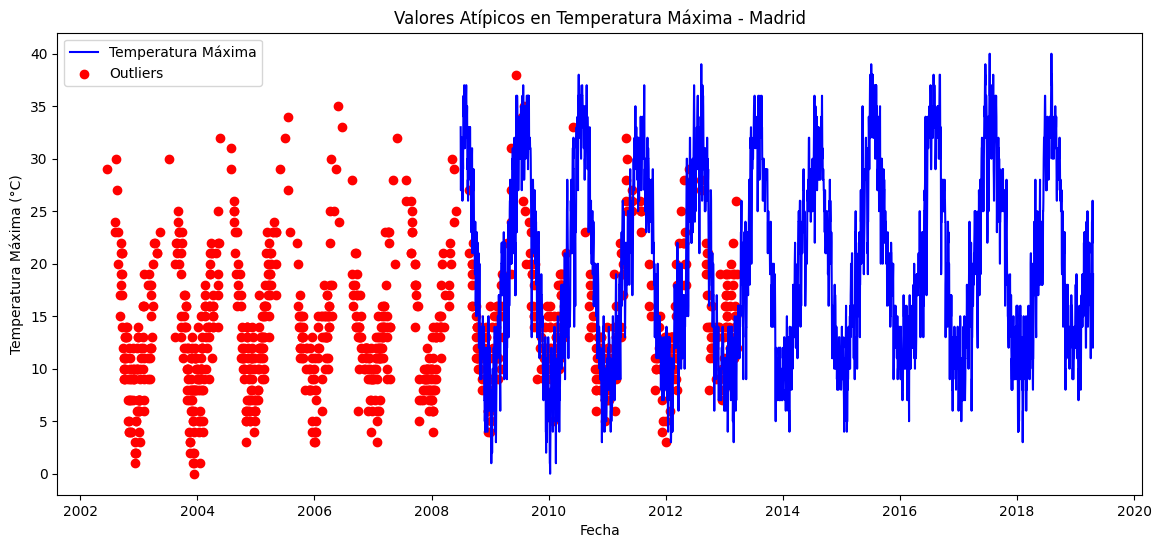

Valores atípicos para Malaga:
        maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  moon_illumination  \
15785        32        21           0.0     14.4        7                  0   
15786        30        21           0.0     14.4        7                  0   
15790        31        21           0.0     14.3        7                 25   
15792        28        20           0.0     14.3        6                 39   
15794        32        22           0.0     14.3        7                 54   
...         ...       ...           ...      ...      ...                ...   
19716        17        11           0.0      7.7        3                 14   
19717        19        13           0.0      9.0        4                 21   
19726        20        16           0.0     10.3        4                 89   
19727        19        14           0.0      6.6        4                 97   
19728        19        13           0.0      7.8        4                100   

       D

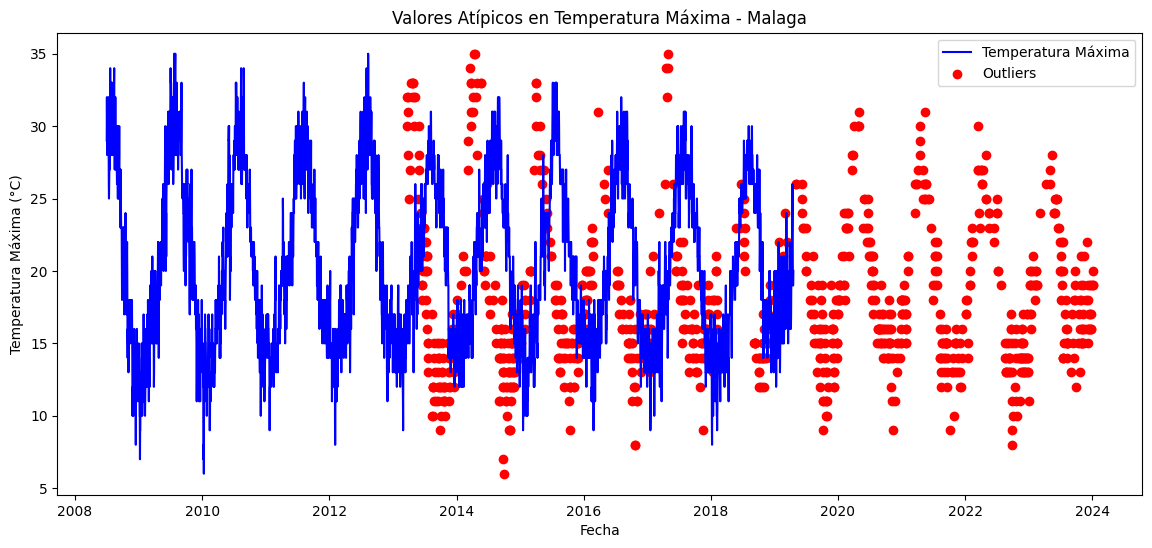

Valores atípicos para Oporto:
        maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  moon_illumination  \
19737        20        16           0.0      3.8        4                 32   
19749        17        13           0.0      3.9        3                 81   
19751        21        14           0.0      5.5        4                 66   
19756        20        14           0.0      5.5        4                 30   
19757        19        15           0.0      3.9        4                 23   
...         ...       ...           ...      ...      ...                ...   
23660        23        20           0.0      5.9        5                  0   
23661        26        20           0.0      5.9        5                  6   
23662        21        20           0.0      5.9        5                 14   
23669        31        21           0.0      8.7        6                 67   
23675        28        19           0.0      5.8        5                 88   

       D

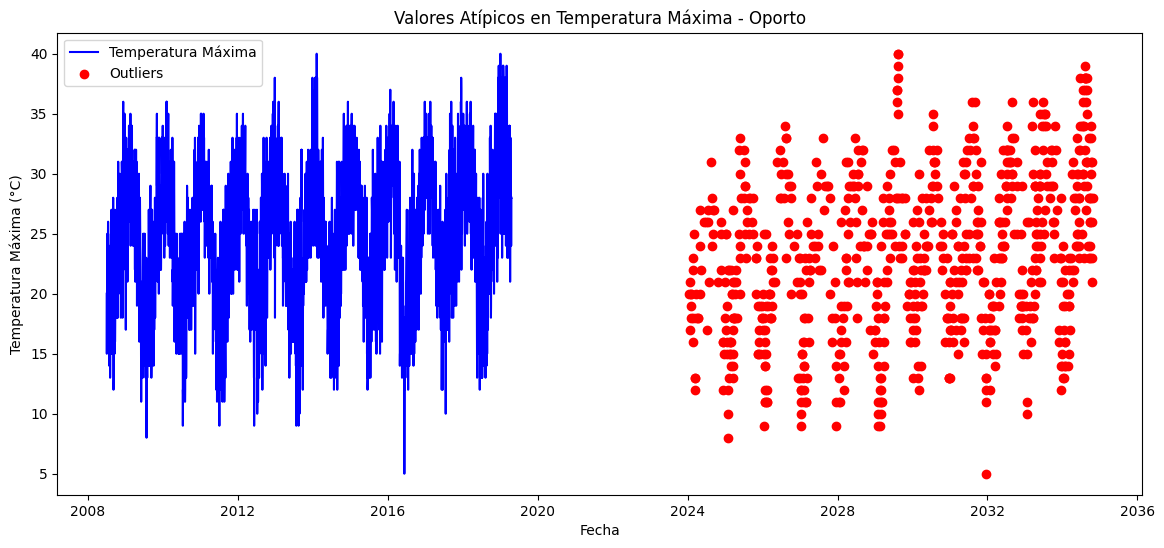

Valores atípicos para Sevilla:
        maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  moon_illumination  \
23736        30        18           0.0     11.6        6                  0   
23743        25        18           0.0      9.0        5                 40   
23744        29        15           0.0     11.6        6                 48   
23746        32        21           0.0     11.6        7                 63   
23757        32        20           0.0     11.6        7                 54   
...         ...       ...           ...      ...      ...                ...   
27610        19         8           0.0      9.0        3                 29   
27618        24        12           0.0     10.9        4                 89   
27619        19        11           0.0      9.7        4                 97   
27620        20        10           0.0     12.1        4                100   
27621        21        11           0.0      9.7        4                 88   

       

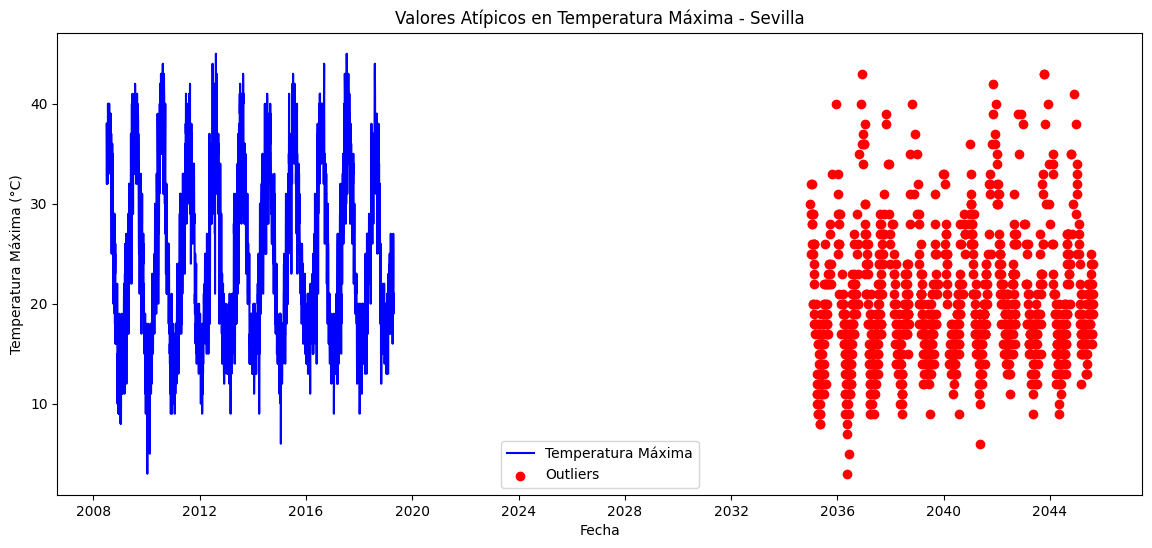

Valores atípicos para Valencia:
        maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  moon_illumination  \
27622        24        19           0.0      6.2        5                  4   
27623        24        20           0.0      6.2        5                  0   
27624        26        19           0.0      7.6        6                  0   
27625        26        20           0.0     10.3        6                  3   
27626        27        18           0.0     10.3        6                 10   
...         ...       ...           ...      ...      ...                ...   
31563        29        23           0.0      6.1        6                 82   
31564        28        22           0.0      6.1        6                 89   
31565        25        20           0.0      7.5        5                 97   
31566        30        22           0.0      6.1        6                100   
31567        30        22           0.0      6.1        6                 88   

      

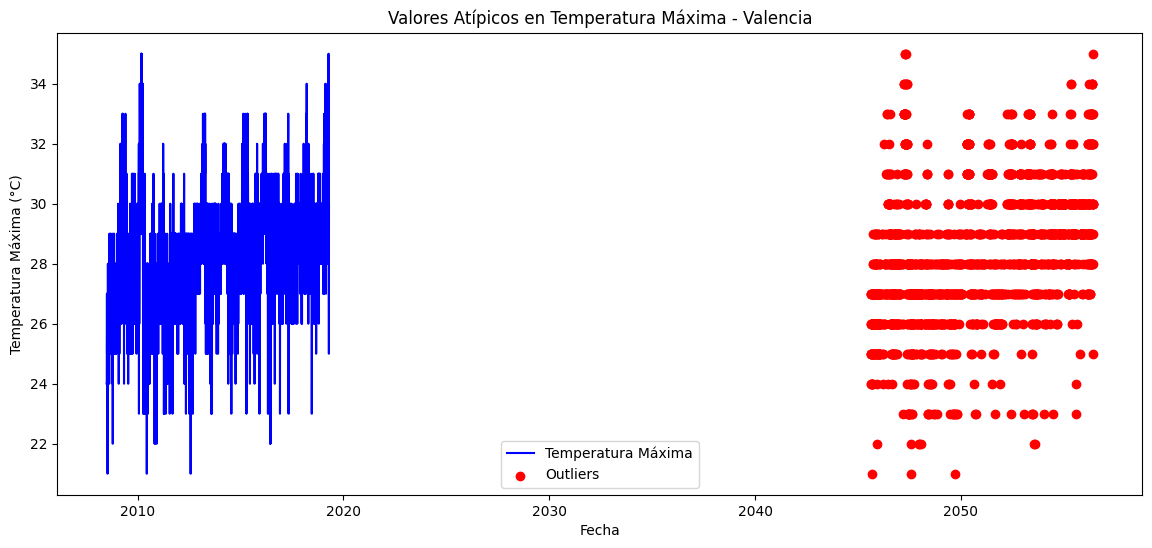

Valores atípicos para Vigo:
        maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  moon_illumination  \
31569        19        12           0.0     14.5        5                  0   
31571        18        13           0.0     11.5        4                  3   
31572        20        13           0.0     14.5        5                 10   
31577        22        14           0.0     10.4        4                 47   
31578        20        13           0.0     14.5        5                 54   
...         ...       ...           ...      ...      ...                ...   
35502        12         9           0.0      9.4        3                 29   
35503        13         9           0.0     12.0        3                 36   
35507        17        13           0.0      8.5        4                 67   
35508        13        10           0.0      9.7        3                 74   
35510        14        11           0.0      8.5        3                 89   

       Dew

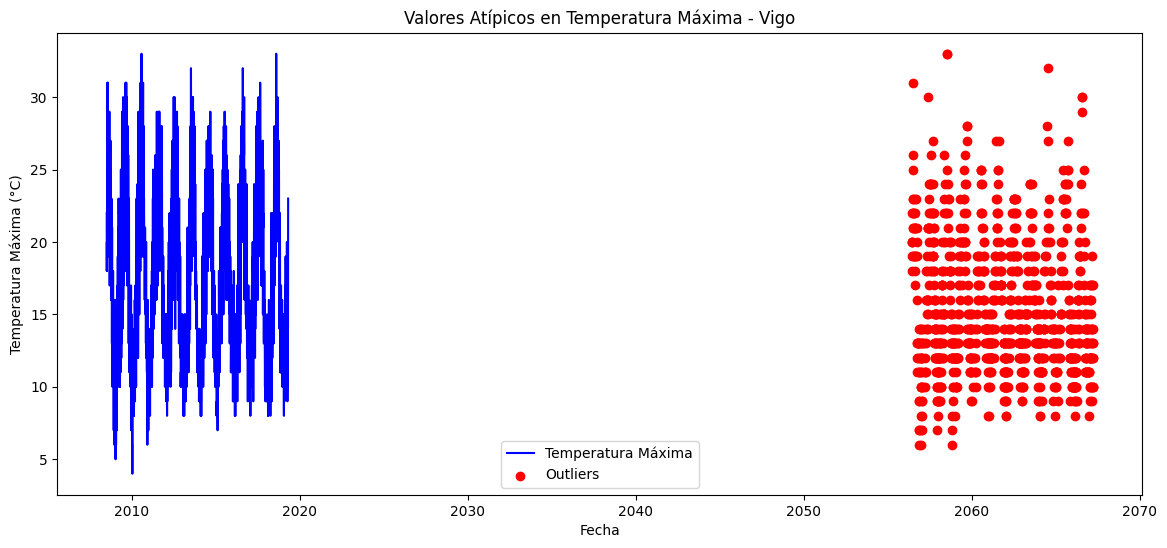

Valores atípicos para Zaragoza:
        maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  moon_illumination  \
35525        21        15           0.0     13.5        4                 61   
35566        26        17           0.0     11.6        6                 55   
35567        27        14           0.0     11.6        5                 48   
35570        31        17           0.0     11.6        6                 26   
35571        32        19           0.0     11.6        6                 19   
...         ...       ...           ...      ...      ...                ...   
39450        16         8           0.0     11.6        4                 44   
39451        17         6           0.0     11.6        4                 52   
39457        19        10           0.0      7.9        4                 97   
39458        20        11           0.0      9.1        4                100   
39459        20        11           0.0     11.6        5                 88   

      

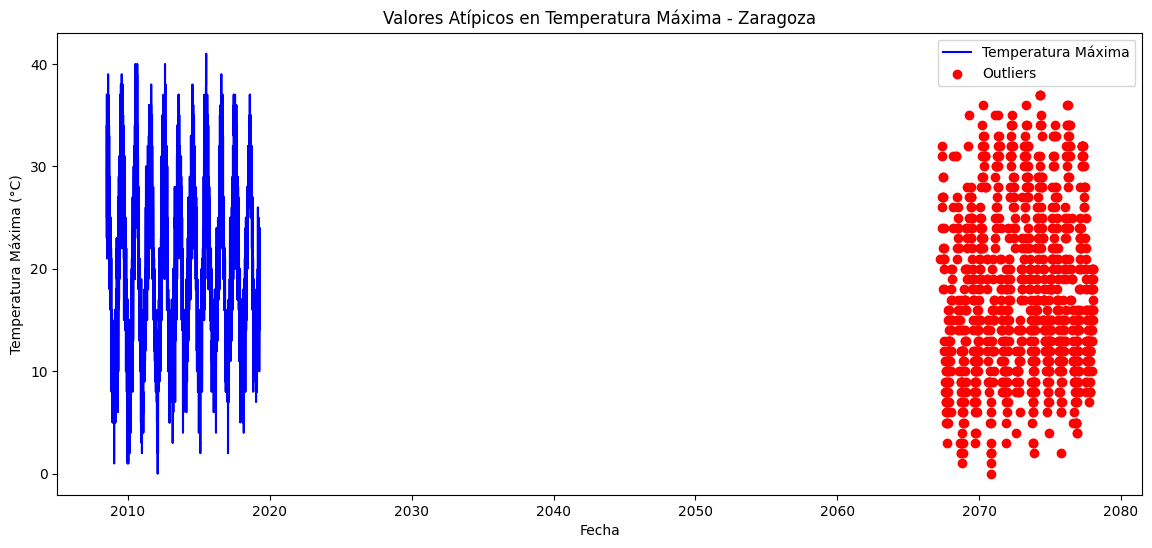

In [35]:
for city, data in grouped:
    # Seleccionar solo columnas numéricas
    numerical_data = data.select_dtypes(include=['float64', 'int64'])
    
    Q1 = numerical_data.quantile(0.25)
    Q3 = numerical_data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Filtrar los valores atípicos
    outliers = numerical_data[((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(f"Valores atípicos para {city}:\n", outliers)
    
    # Visualización de valores atípicos para la temperatura máxima como ejemplo
    plt.figure(figsize=(14, 6))
    plt.plot(data['date_time'], data['maxtempC'], label='Temperatura Máxima', color='blue')
    plt.scatter(outliers.index, outliers['maxtempC'], color='red', label='Outliers')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura Máxima (°C)')
    plt.title(f'Valores Atípicos en Temperatura Máxima - {city}')
    plt.legend()
    plt.show()
